In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy
import numpy as np
import glob
from scipy.stats import mannwhitneyu
from matplotlib.pyplot import subplot_mosaic as mosaic
import matplotlib.transforms as mtransforms
import math
import matplotlib

## Preparations

In [2]:
cwd = os.getcwd()
n = 100 # nb of random partitions
k = 5000 # nb of max top_k_edges selected
m = 10 # number of iterations on confounder-based partitions
ct_sels_init = ['BRCA_metabric', 'BRCA', 'CESC', 'COAD', 'GBM', 'HNSC', 'KIRC', 'KIRP', 'LUAD', 'LUSC', 'PCPG', 'READ', 'STAD']
confs_init = ['tobacco_smoking_history', 'alcohol_history.exposures', 'age_quartile', 'age_at_initial_pathologic_diagnosis', 'race.demographic', 'gender.demographic', 'tumor_stage.diagnoses', 'Tumor Stage']
algs = ['ARACNE', 'CEMITOOL', 'GRNBOOST2', 'WGCNA'] # string identifiers of algorithms
alpha = 0.05

## Read data from Jaccard Indices for all tools, confounders, cohorts and partition types

In [3]:
JI = pd.DataFrame(columns = ['Confounder/\nvariable', 'Cohort', 'Method', 'Partition type', 'partID', 'k', 'mean JI'])
for alg_sel in algs:
    for conf_sel in confs_init:
        for ct_sel in ct_sels_init:
            path = os.path.join(cwd, alg_sel, str(ct_sel))
            for i in range(m):
                try:
                    filename = f'cb_{i}_{alg_sel}_{conf_sel}_{ct_sel}_jaccInd.csv'
                    filename = os.path.join(path, filename)
                    df_conf = pd.read_csv(filename, sep=',', header=0)
                    df_conf['partID'] = i
                    df_conf['Partition type'] = 'confounder-based partition'
                    df_conf['Method'] = alg_sel
                    df_conf['Cohort'] = ct_sel
                    df_conf['Confounder/\nvariable'] = conf_sel
                    JI = pd.concat([JI, df_conf])
                except:
                    continue
for alg_sel in algs:
    for conf_sel in confs_init:
        for ct_sel in ct_sels_init:
            path = os.path.join(cwd, alg_sel, str(ct_sel))
            for i in range(n):
                filename = 'rnd'+'_'+str(i)+'_'+alg_sel+'_'+conf_sel+'_'+ct_sel+'_jaccInd.csv'
                try:
                    df_rnd = pd.read_csv(os.path.join(path, filename), sep=',', header=0)                   
                    df_rnd['partID'] = i
                    df_rnd['Partition type'] = 'random partition'
                    df_rnd['Method'] = alg_sel
                    df_rnd['Cohort'] = ct_sel
                    df_rnd['Confounder/\nvariable'] = conf_sel
                except:
                    continue
                JI = pd.concat([JI, df_rnd])
JI_all = JI.copy()
print(JI_all.head())

     Confounder/\nvariable Cohort  Method              Partition type partID  \
0  tobacco_smoking_history   CESC  ARACNE  confounder-based partition      0   
1  tobacco_smoking_history   CESC  ARACNE  confounder-based partition      0   
2  tobacco_smoking_history   CESC  ARACNE  confounder-based partition      0   
3  tobacco_smoking_history   CESC  ARACNE  confounder-based partition      0   
4  tobacco_smoking_history   CESC  ARACNE  confounder-based partition      0   

     k   mean JI  size intersection  size union  \
0   10  0.260504                3.0        17.0   
1  110  0.115993               16.0       204.0   
2  210  0.106272               24.0       396.0   
3  310  0.095401               26.0       594.0   
4  410  0.094445               36.0       784.0   

                                     state  
0  filled1.02.0_filled1.04.0_filled2.04.0_  
1  filled1.02.0_filled1.04.0_filled2.04.0_  
2  filled1.02.0_filled1.04.0_filled2.04.0_  
3  filled1.02.0_filled1.04.0_fil

In [4]:
# adjust fields
JI_all['Confounder/\nvariable'] = JI_all['Confounder/\nvariable'].replace(['race'], 'ethnicity')
JI_all['Confounder/\nvariable'] = JI_all['Confounder/\nvariable'].replace(['race.demographic'], 'ethnicity')
JI_all['Confounder/\nvariable'] = JI_all['Confounder/\nvariable'].replace(['age_quartile'], 'age')
JI_all['Confounder/\nvariable'] = JI_all['Confounder/\nvariable'].replace(['gender.demographic'], 'sex')
JI_all['Confounder/\nvariable'] = JI_all['Confounder/\nvariable'].replace(['tumor_stage.diagnoses'], 'stage')
JI_all['Confounder/\nvariable'] = JI_all['Confounder/\nvariable'].replace(['Tumor Stage'], 'stage')
JI_all['Cohort'] = JI_all['Cohort'].replace(['BRCA_metabric'], 'BRCA*')
JI_all['Confounder/\nvariable'] = JI_all['Confounder/\nvariable'].replace(['age_at_initial_pathologic_diagnosis'], 'age')
JI_all.rename(columns={'mean JI': 'Mean JI'}, inplace=True)
JI_all = JI_all[JI_all['k']%100 == 10]
JI_all['Method'] = JI_all['Method'].replace(['ARACNE'], 'ARACNe-AP').replace(['CEMITOOL'], 'CEMiTool').replace(['GRNBOOST2'], 'GRNBoost2')
JI_all['Cohort x\nConfounder'] = JI_all['Cohort'] + ' x ' + JI_all['Confounder/\nvariable']
#JI_all.reset_index(inplace=True)

In [7]:
confs = ['tobacco_smoking_history', 'alcohol_history.exposures', 'age', 'ethnicity', 'sex', 'stage']
ct_sels = ['BRCA*', 'BRCA', 'CESC', 'COAD', 'GBM', 'HNSC', 'KIRC', 'KIRP', 'LUAD', 'LUSC', 'PCPG', 'READ', 'STAD']

## Generate plots for supplement

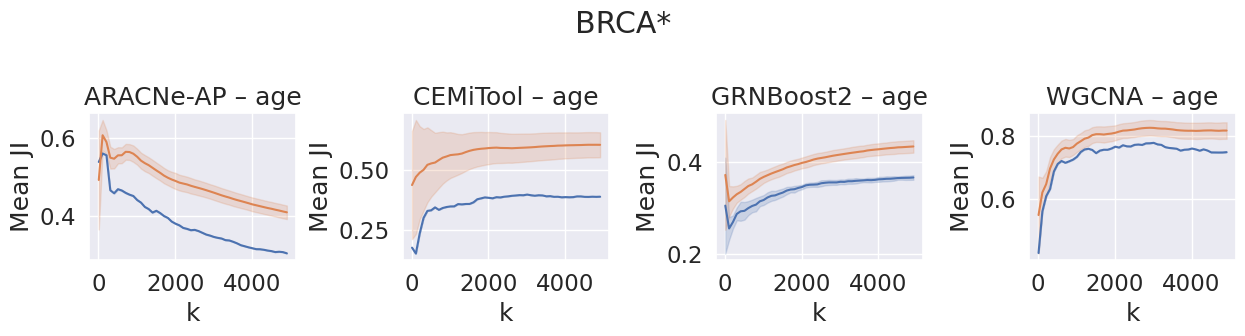

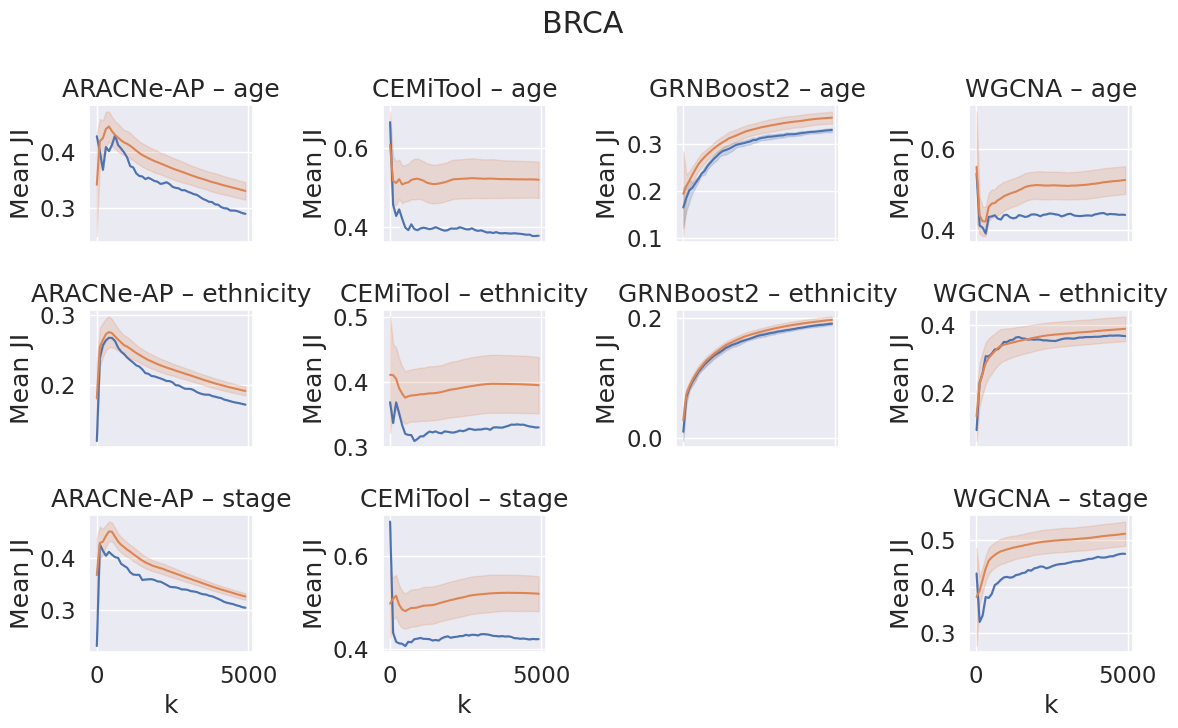

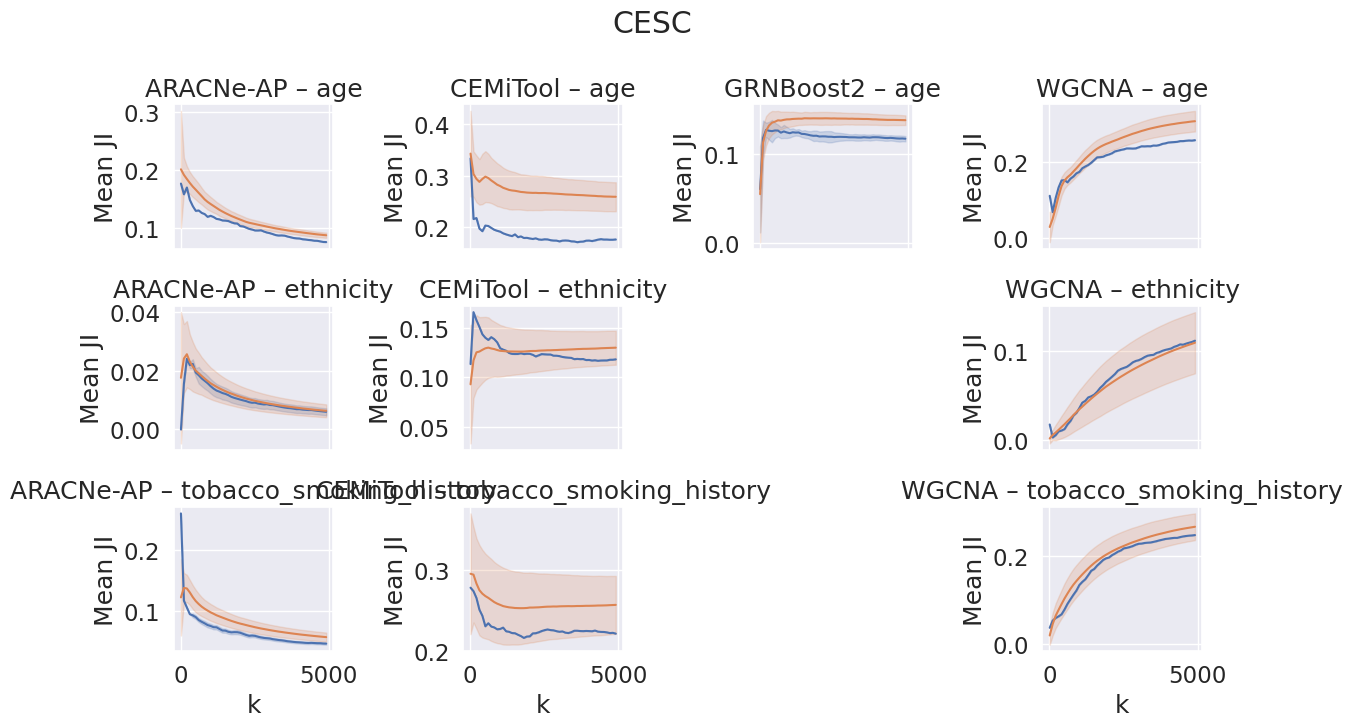

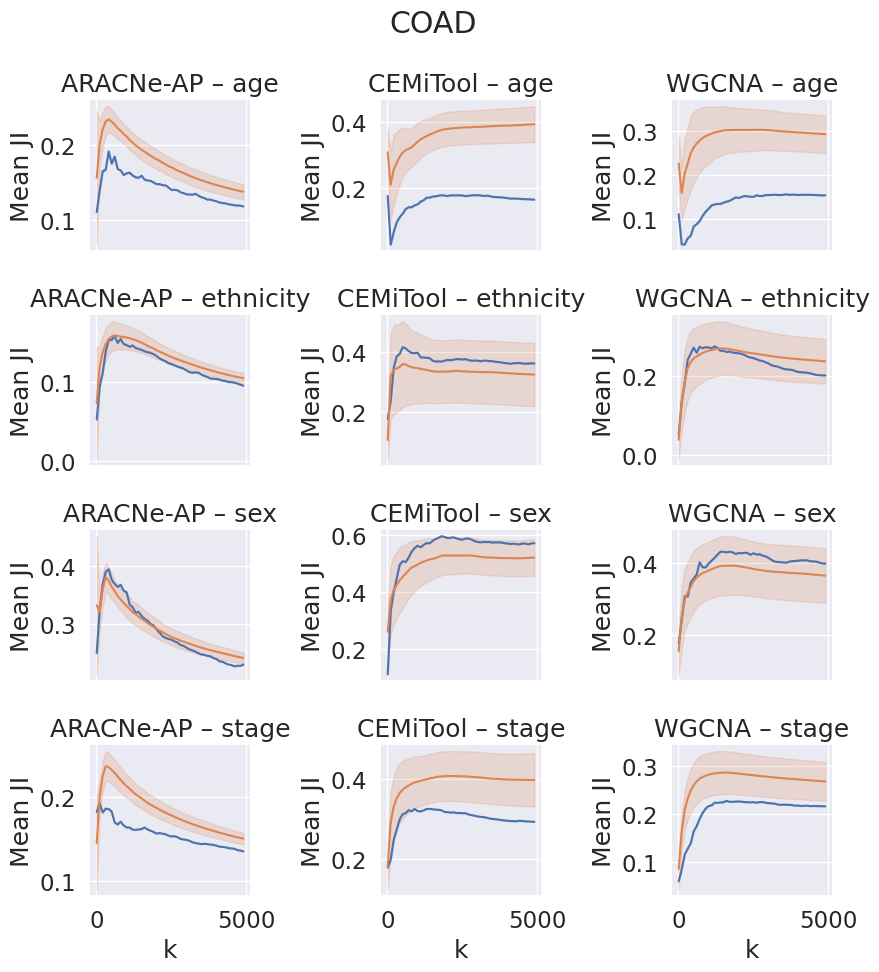

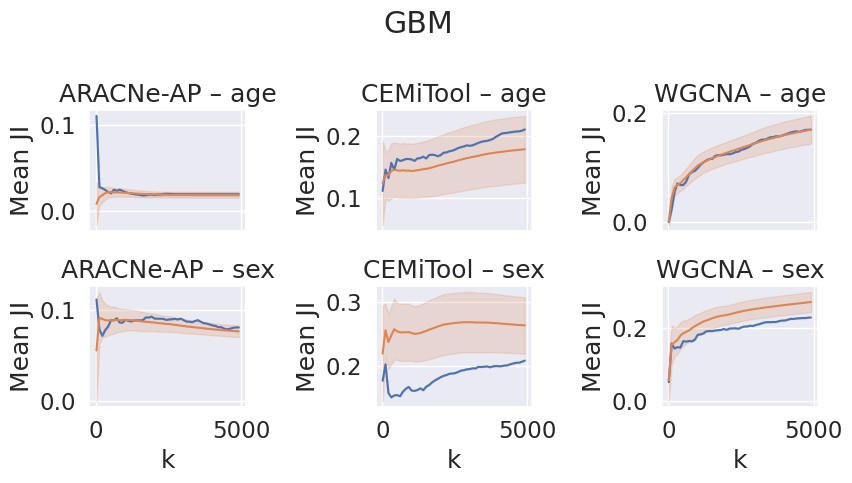

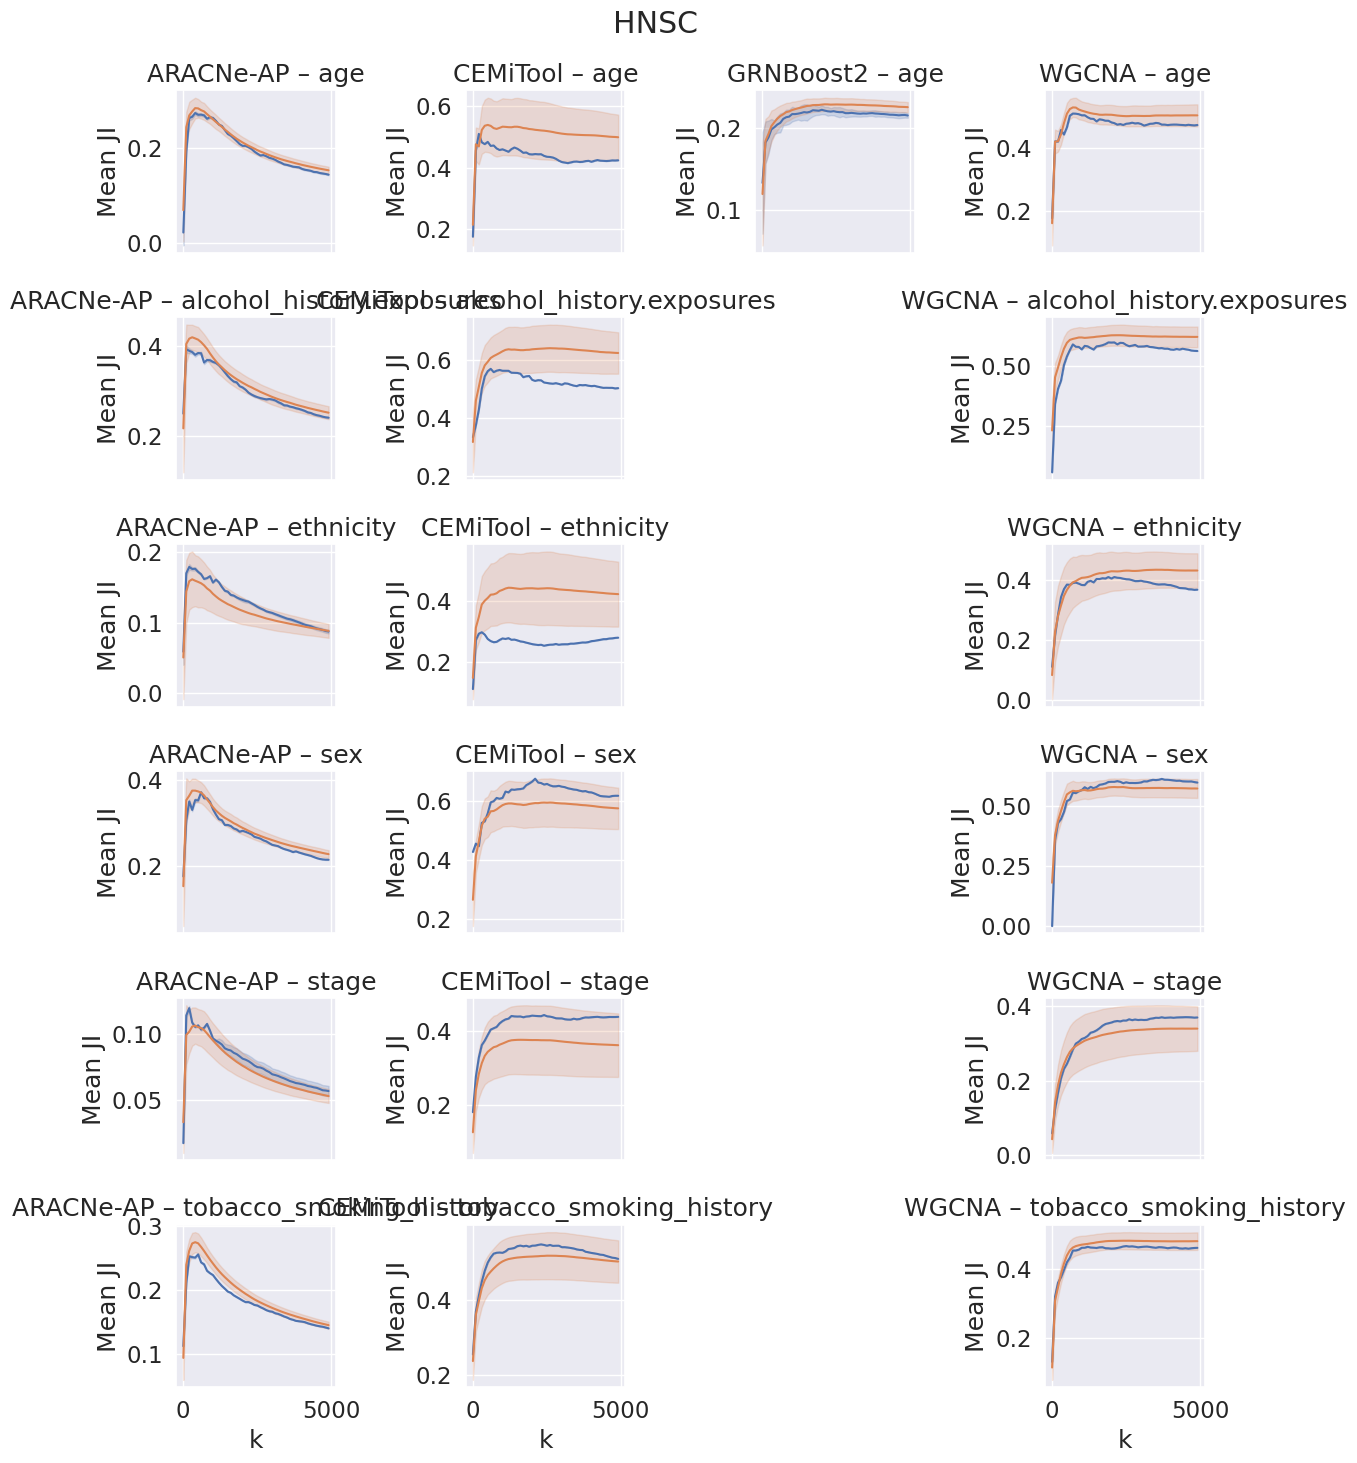

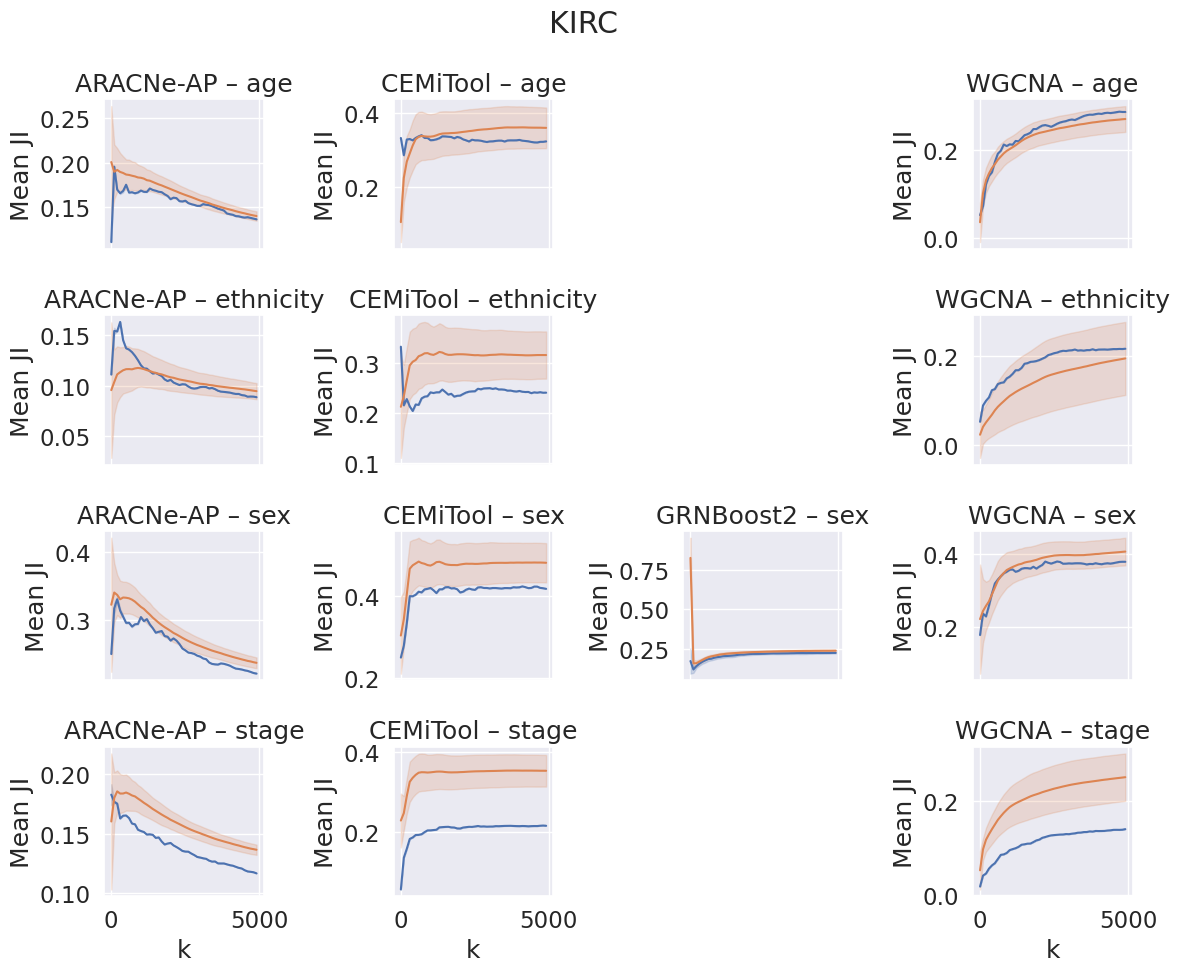

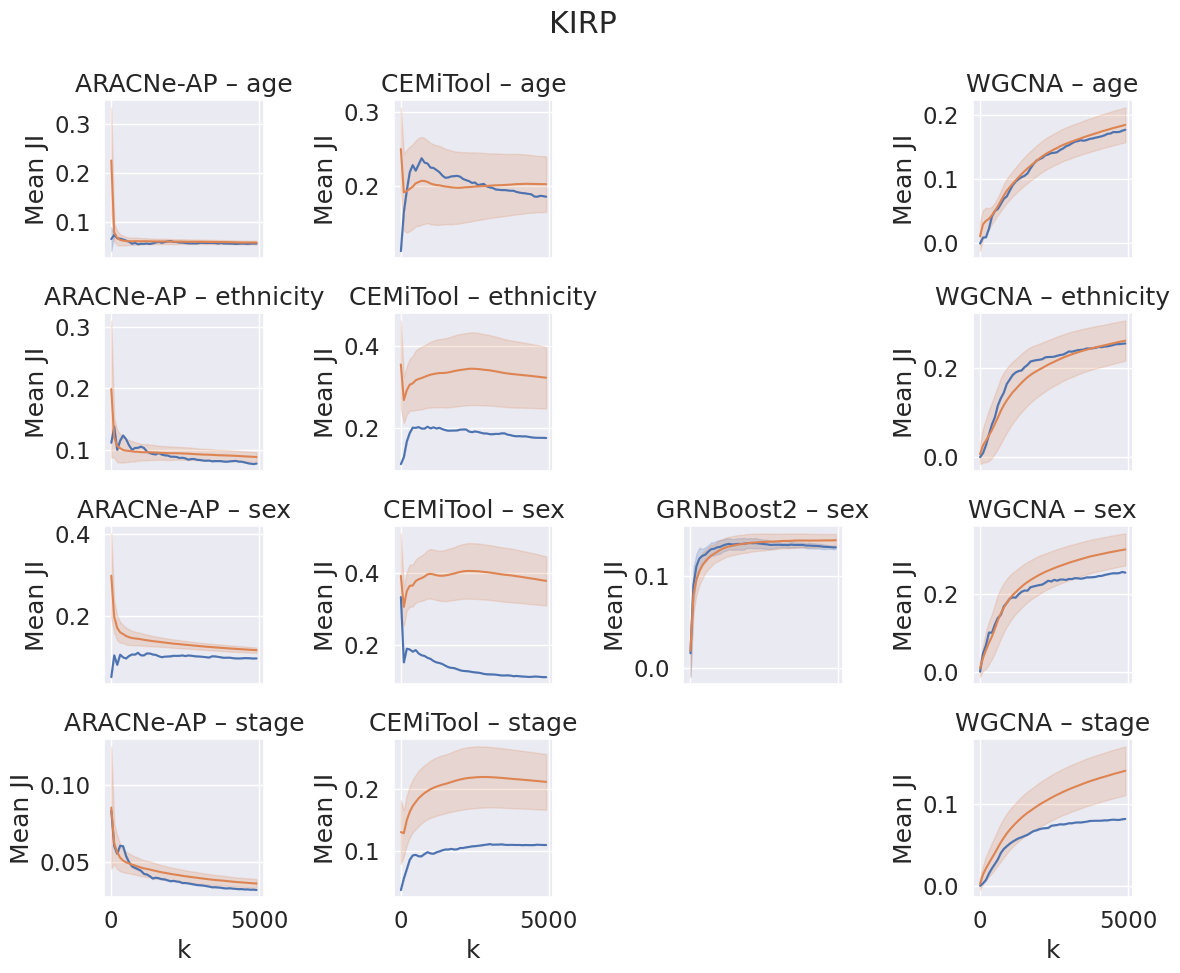

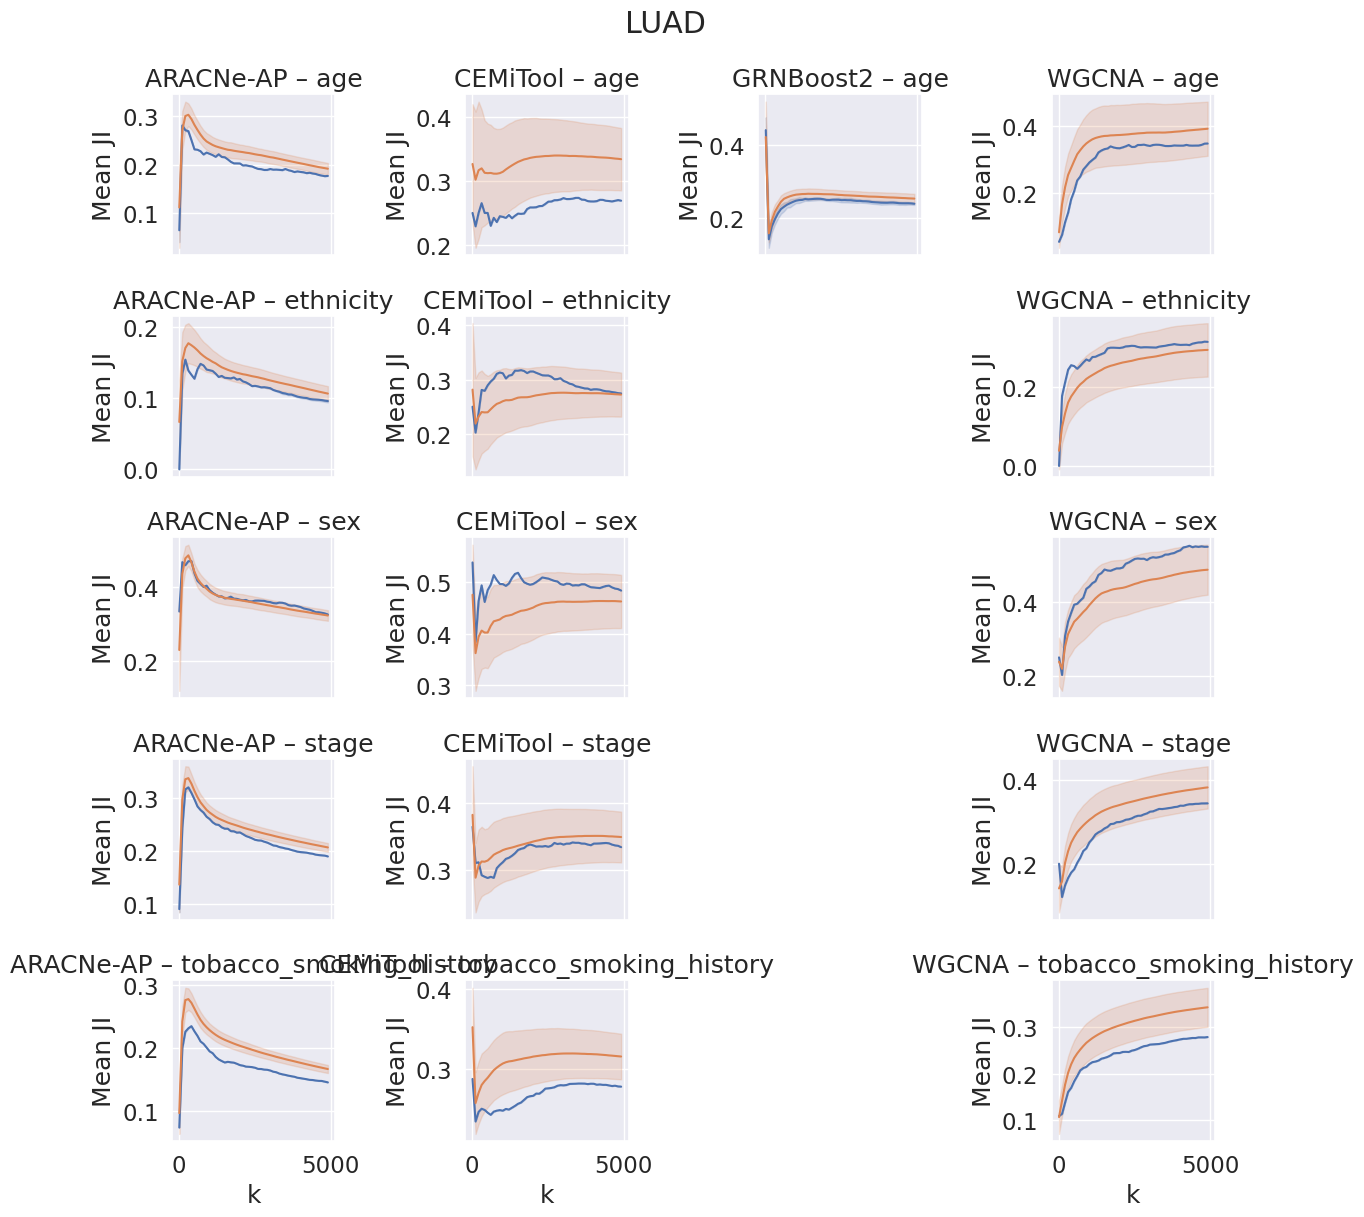

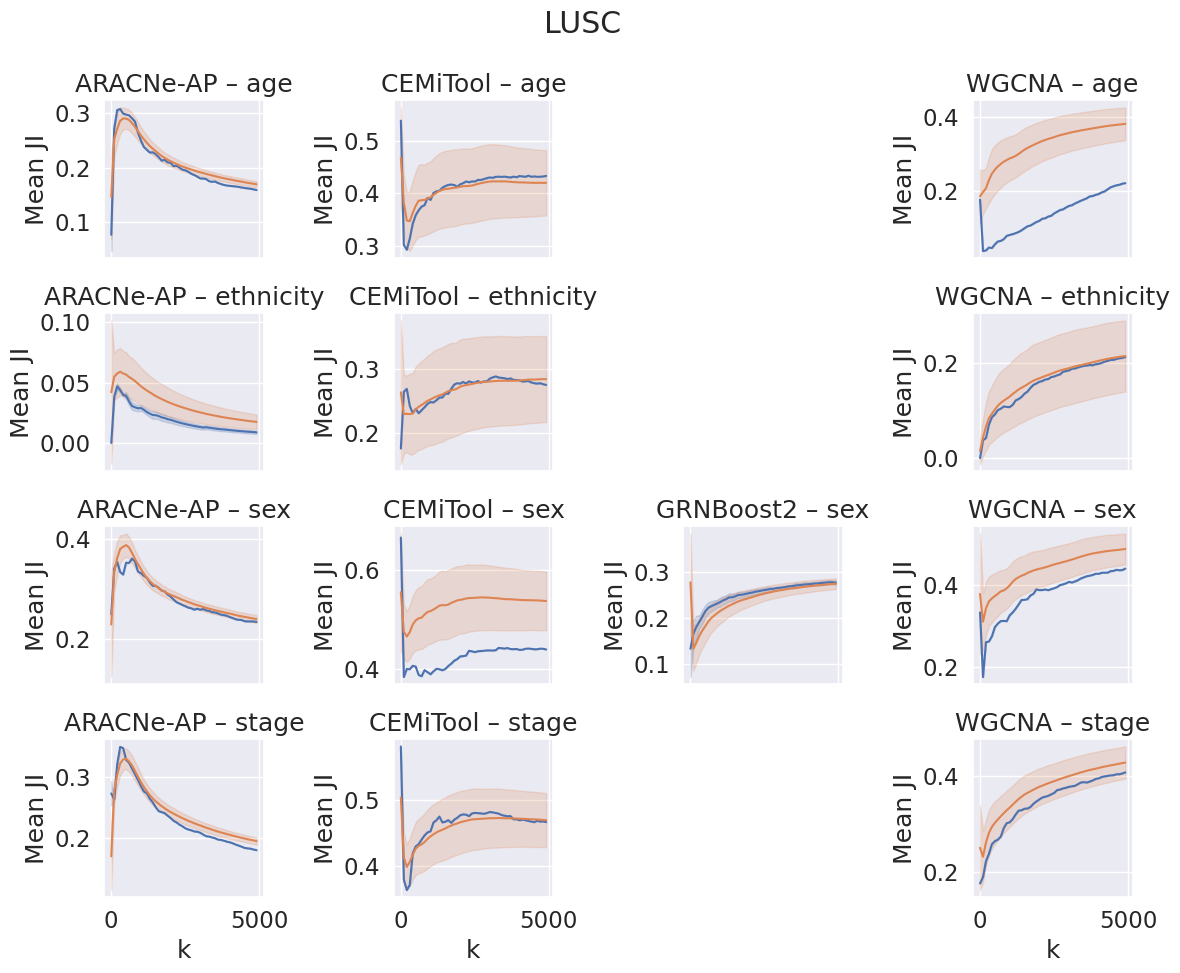

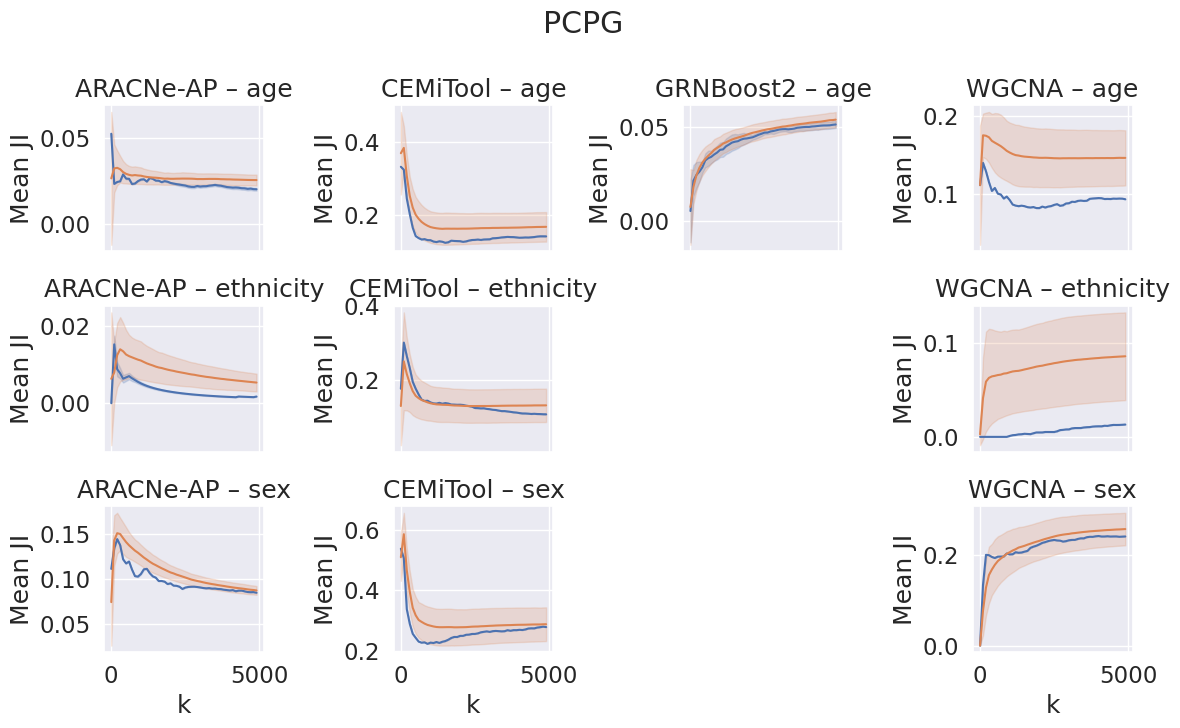

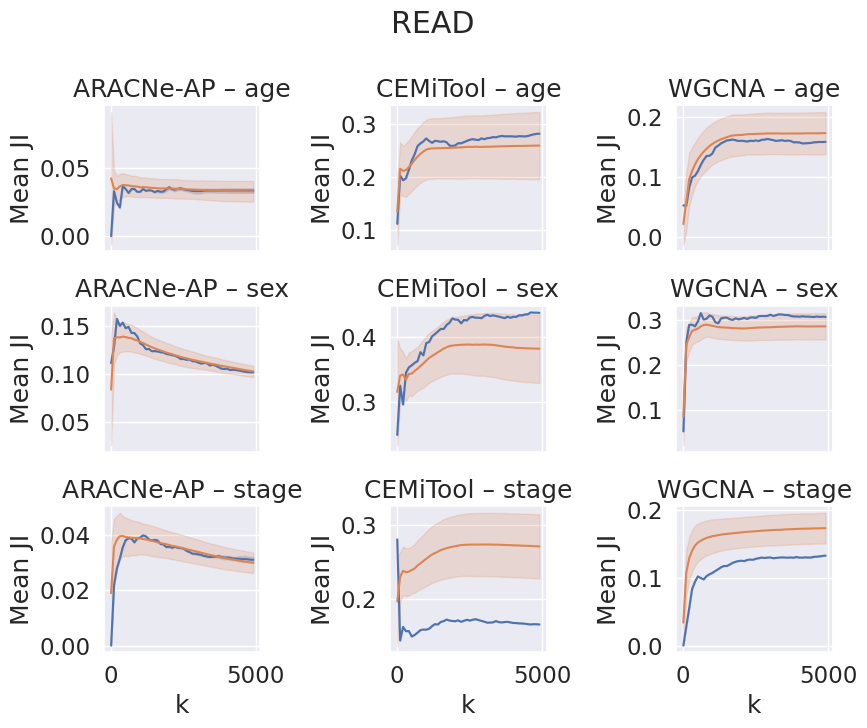

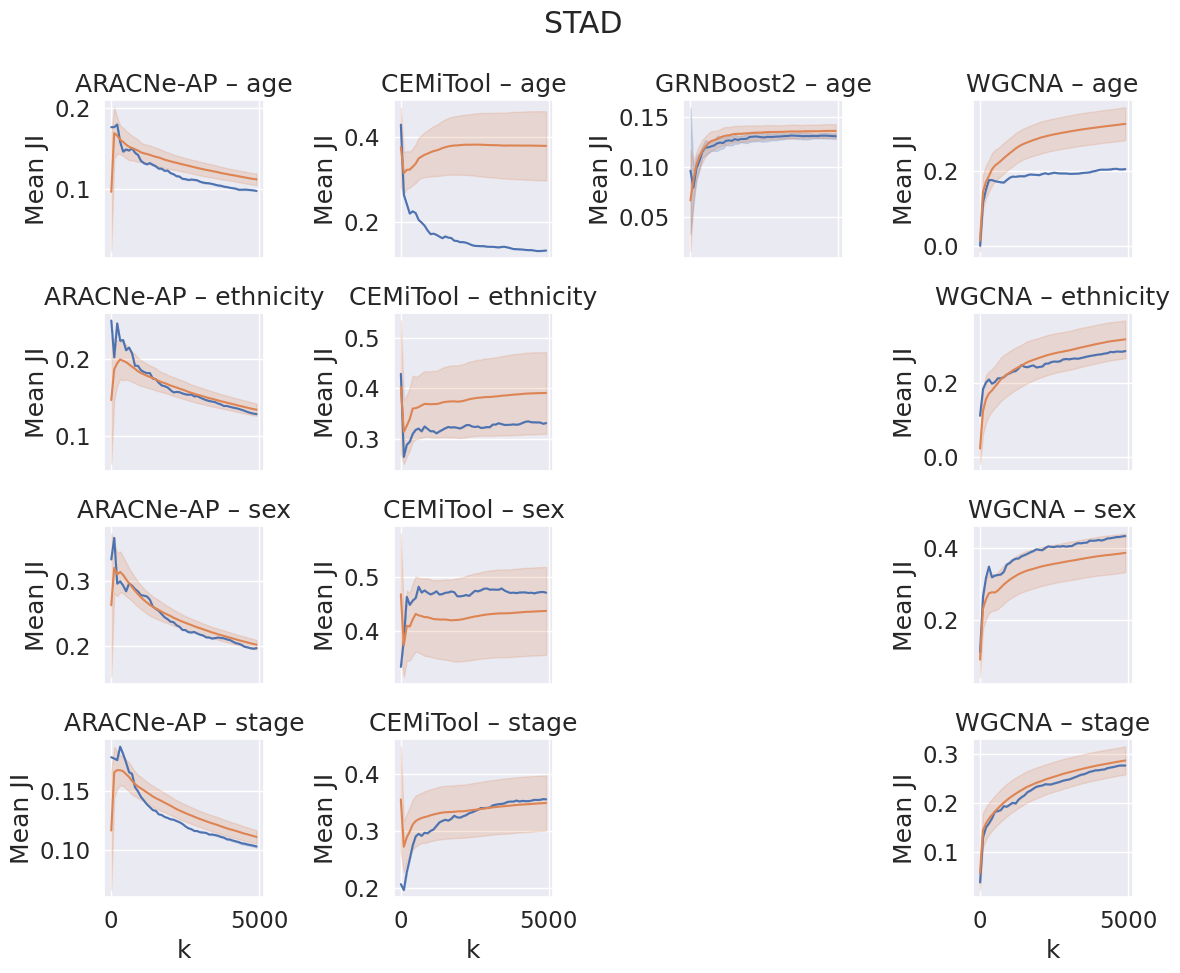

In [8]:
plt.style.use('default')
sns.set(font_scale=1.5)
sns.set_style('darkgrid')
for ct_sel in ct_sels:
    JI_ct = JI_all[JI_all['Cohort']==ct_sel]
    confounders = sorted(list(set(JI_ct['Confounder/\nvariable'].values)))
    algos = sorted(list(set(JI_ct['Method'].values)))
    if len(confounders) == 1:
        fig, axs = plt.subplots(1, len(algos), figsize=(3.2*len(algos), 3.5*len(confounders)), sharex=True, sharey=False)
    else:
        fig, axs = plt.subplots(len(confounders), len(algos), figsize=(3*len(algos), 2.5*len(confounders)), sharex=True, sharey=False)
    for i, conf in enumerate(confounders):
        JI_conf = JI_ct[JI_ct['Confounder/\nvariable'] == conf]
        for j, algo in enumerate(algos):
            JI_alg = JI_conf[JI_conf['Method'] == algo]
            if JI_alg.shape[0] == 0:
                axs[i, j].axis('off')
            else:
                try:
                    sns.lineplot(data=JI_alg, x='k', y='Mean JI', errorbar='sd', ax=axs[i,j], hue='Partition type', legend=False)
                    axs[i,j].set_title(f'{algo} – {conf}')
                except IndexError:
                    sns.lineplot(data=JI_alg, x='k', y='Mean JI', errorbar='sd', ax=axs[j], hue='Partition type', legend=False)
                    axs[j].set_title(f'{algo} – {conf}')
    fig.suptitle(ct_sel)
    fig.tight_layout()
    fig.savefig(f'plots/{ct_sel}_block_comparisons.pdf')

## Compute P-values of one-sided Mann-Whitney U-test for each k

In [9]:
mwus = pd.DataFrame(columns=['Method', 'Cohort', 'Confounder/\nvariable', 'k', 'mwu.pvalue'])
for alg_sel in ['ARACNe-AP', 'CEMiTool', 'GRNBoost2', 'WGCNA']:
    JI_ = JI_all[JI_all['Method'] == alg_sel]
    for cohort in ct_sels:
        coh = JI_[JI_['Cohort'] == cohort]
        for conf_sel in confs:
            conf = coh[coh['Confounder/\nvariable'] == conf_sel]
            if len(conf) == 0:
                continue
            c = conf[conf['Partition type']=='confounder-based partition']
            r = conf[conf['Partition type']=='random partition']
            for k in sorted(list(set(c['k']))):
                c_k = c[c['k'] == k]
                r_k = r[r['k'] == k]
                mwu = mannwhitneyu(c_k['Mean JI'],r_k['Mean JI'], alternative='less')
                df = pd.DataFrame([[alg_sel, cohort, conf_sel, k, mwu.pvalue]], columns=['Method', 'Cohort', 'Confounder/\nvariable', 'k', 'mwu.pvalue'])
                mwus = pd.concat([mwus, df])
                
mwus.reset_index(inplace=True)
manh = mwus.drop('index', axis=1)
mwus = mwus.drop('index', axis=1).drop('k', axis=1)

count = mwus.groupby(['Method', 'Cohort', 'Confounder/\nvariable']).count().reset_index()
count.rename(columns={'mwu.pvalue':'total.pvalues'}, inplace=True)

sign_ = mwus[mwus['mwu.pvalue'] < alpha]
sign_ = sign_.groupby(['Method', 'Cohort', 'Confounder/\nvariable']).count().reset_index()
sign_.rename(columns={'mwu.pvalue':'sign.pvalues'}, inplace=True)
sign = pd.merge(count, sign_,  how='left', left_on=['Method', 'Cohort', 'Confounder/\nvariable'],
              right_on=['Method', 'Cohort', 'Confounder/\nvariable']).fillna(0)
sign['frac'] = sign['sign.pvalues']/sign['total.pvalues']
_mwus = pd.DataFrame(sign).reset_index()
_mwus = _mwus[(_mwus['Method'] != 'GRNBoost2') & (_mwus['Method'] != 'GENIE3')]
_mwus['Confounder/\nvariable'] = pd.Categorical(_mwus['Confounder/\nvariable'], ['tobacco_smoking_history', 'age', 'ethnicity', 'sex', 'stage'])
corr_coeff= _mwus.pivot(columns='Method',values='frac',index=['Cohort','Confounder/\nvariable']).corr()

In [11]:
_mwus[_mwus['Confounder/\nvariable'] == 'tobacco_smoking_history']

index     Method Cohort    Confounder/\nvariable  total.pvalues  \
6        6  ARACNe-AP   CESC  tobacco_smoking_history             50   
18      18  ARACNe-AP   HNSC  tobacco_smoking_history             50   
31      31  ARACNe-AP   LUAD  tobacco_smoking_history             50   
52      52   CEMiTool   CESC  tobacco_smoking_history             50   
64      64   CEMiTool   HNSC  tobacco_smoking_history             50   
77      77   CEMiTool   LUAD  tobacco_smoking_history             50   
109    109      WGCNA   CESC  tobacco_smoking_history             50   
121    121      WGCNA   HNSC  tobacco_smoking_history             50   
134    134      WGCNA   LUAD  tobacco_smoking_history             50   

     sign.pvalues  frac  
6            49.0  0.98  
18           49.0  0.98  
31           50.0  1.00  
52           47.0  0.94  
64            0.0  0.00  
77           50.0  1.00  
109           9.0  0.18  
121          47.0  0.94  
134          49.0  0.98

<Figure size 640x480 with 0 Axes>

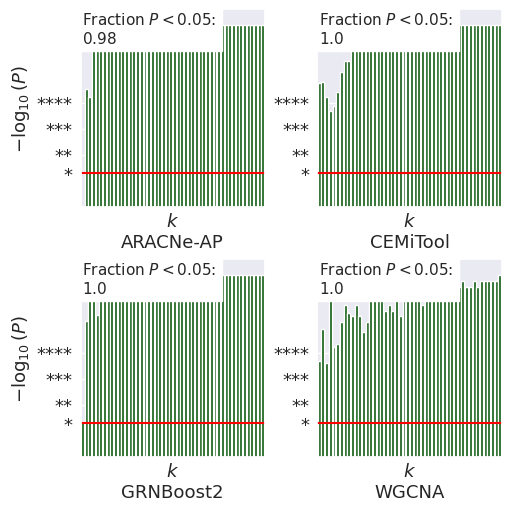

In [41]:
plt.tight_layout()
plt.style.use('default')
sns.set(font_scale=1.5)

manh = manh[(manh['Cohort'] == 'BRCA*') & (manh['Confounder/\nvariable'] == 'age')]
manh.reset_index(inplace=True)
manh['Cohort - Variable'] = manh['Cohort'] + ' – ' + manh['Confounder/\nvariable']
manh['k'] = pd.Categorical(manh['k'], range(10, 5000, 100))
manh['-log(p)'] = -np.log10(manh['mwu.pvalue'])
cohort_confs = sorted(list(set(manh['Cohort - Variable'].values)))
algs = ['ARACNe-AP', 'CEMiTool', 'GRNBoost2', 'WGCNA']

mosaic = [algs[0:2], algs[2:4]]

fig, axs = plt.subplot_mosaic(mosaic, figsize=(5,5),sharex=False, sharey=False, constrained_layout=True)

for alg in algs:
    manh_alg = manh[manh['Method'] == alg]
    cohort_conf = alg
    axs[cohort_conf].set_ylim([0, 7.6])
    axs[cohort_conf].axhline(y=-np.log10(0.05), linestyle='-', color='red')
    axs[cohort_conf].tick_params(top=False, labeltop=False, bottom=False, labelbottom=False)
    mwus_cohort_conf = manh_alg[manh_alg['Cohort - Variable'] == 'BRCA* – age']
    sns.barplot(data=mwus_cohort_conf, x='k', y='-log(p)', ax=axs[cohort_conf], color='darkgreen')
    axs[cohort_conf].set(ylabel=None)
    axs[cohort_conf].set_yticks([-np.log10(0.05),-np.log10(0.01),-np.log10(0.001),-np.log10(0.0001)])
    axs[cohort_conf].set_yticklabels(['*','**','***','****'], fontsize=13)
    axs[cohort_conf].tick_params(axis='y', which='major', pad=0)
    axs[cohort_conf].set_xlabel('$k$\n'+cohort_conf, fontsize=13)
    if alg == algs[0] or alg == algs[2]:
        axs[cohort_conf].set_ylabel('$-\log_{10}(P)$', fontsize=13,  labelpad=3)
    #if alg == algs[0]:
        #axs[cohort_conf].set_title('METABRIC BRCA (BRCA*)',loc='left', fontsize=11)
    frac = mwus_cohort_conf[mwus_cohort_conf['mwu.pvalue'] < 0.05].shape[0] / mwus_cohort_conf.shape[0]
    axs[cohort_conf].text(.01, .99, f'Fraction $P<0.05$:\n${frac}$', ha='left', va='top', transform=axs[cohort_conf].transAxes,
                          fontsize=11, backgroundcolor='white')
fig.savefig('plots/fig5.pdf')

## Generate plots for method-centric view – big plot

/home/anna/miniconda3/envs/flowcy2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/anna/miniconda3/envs/flowcy2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


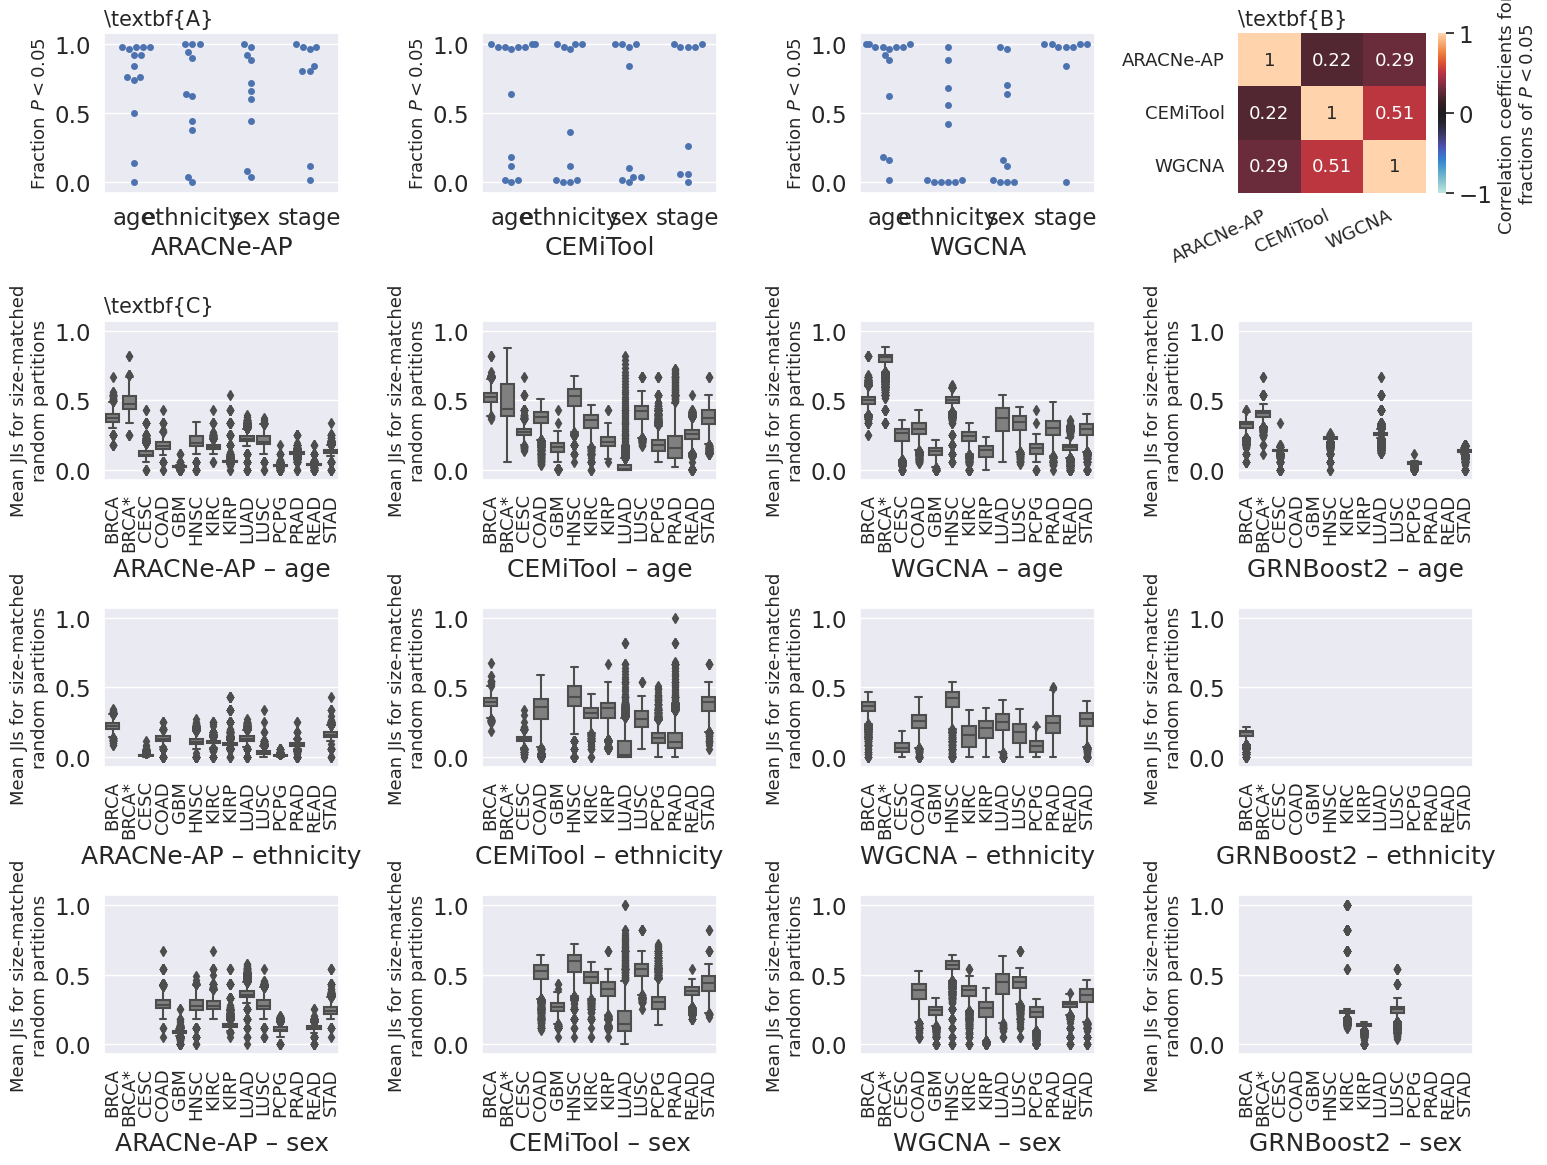

In [10]:
JI_all_random = JI_all[JI_all['Partition type'] == 'random partition']
JI_all_random = JI_all_random[JI_all_random['Confounder/\nvariable'] != 'stage']
plt.style.use('default')
#plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = 'Helvetica'
sns.set(font_scale=1.5)
sns.set_style('darkgrid',{'axes.grid' : True})
confounders = sorted(list(set(JI_all_random['Confounder/\nvariable'].values)))
algos = ['ARACNe-AP','CEMiTool','WGCNA','GRNBoost2']
cohorts = sorted(list(set(JI_all_random['Cohort'].values)))
mosaic = [['ARACNe-AP','CEMiTool','WGCNA','heatmap'],
          [f'{algo} – age' for algo in algos],
          [f'{algo} – ethnicity' for algo in algos],
          [f'{algo} – sex' for algo in algos]]
fig, axs = plt.subplot_mosaic(mosaic, figsize=(4*len(algos), 3*(len(confounders)+1)),sharex=False, sharey=False)
for algo in ['ARACNe-AP','CEMiTool','WGCNA']:
    axs[algo].set_ylim([-0.075, 1.075])
    _mwus_alg = _mwus[_mwus['Method'] == algo]
    sns.swarmplot(data=_mwus_alg,y='frac',x='Confounder/\nvariable',ax=axs[algo])
    axs[algo].set_ylabel('Fraction $P<0.05$',fontsize=13)
    axs[algo].set_xlabel(algo)
for conf in confounders:
    JI_conf = JI_all_random[JI_all_random['Confounder/\nvariable'] == conf]
    for algo in algos:
        conf_alg = f'{algo} – {conf}'
        axs[conf_alg].set_ylim([-0.075, 1.075])
        JI_alg = JI_conf[JI_conf['Method'] == algo]
        sns.boxplot(data=JI_alg,y='Mean JI',x='Cohort',ax=axs[conf_alg],order=cohorts,color='grey')
        axs[conf_alg].set_ylabel('Mean JIs for size-matched\nrandom partitions',fontsize=13)
        axs[conf_alg].set_xlabel(f'{algo} – {conf}')
        axs[conf_alg].set_xticklabels(axs[conf_alg].get_xticklabels(), rotation=90,fontsize=13)
    axs['ARACNe-AP'].set_title(r'\textbf{A}',loc='left', fontsize=15)
    axs['ARACNe-AP – age'].set_title(r'\textbf{C}',loc='left', fontsize=15)
sns.heatmap(corr_coeff,annot=True,center=0.0,vmin=-1,vmax=1,ax=axs['heatmap'],annot_kws={'fontsize':13})
colorbar = axs['heatmap'].collections[0].colorbar
colorbar.set_label('Correlation coefficients for\nfractions of $P<0.05$',fontsize=13)
axs['heatmap'].set_xticklabels(axs['heatmap'].get_xticklabels(), rotation=25, ha='right',fontsize=13)
axs['heatmap'].set_yticklabels(axs['heatmap'].get_yticklabels(), fontsize=13)
axs['heatmap'].set_xlabel('')
axs['heatmap'].set_ylabel('')
axs['heatmap'].set_title(r'\textbf{B}',loc='left', fontsize=15)
fig.tight_layout()
fig.savefig('plots/fig4big.pdf')

## Generate plots for method-centric view – small plot

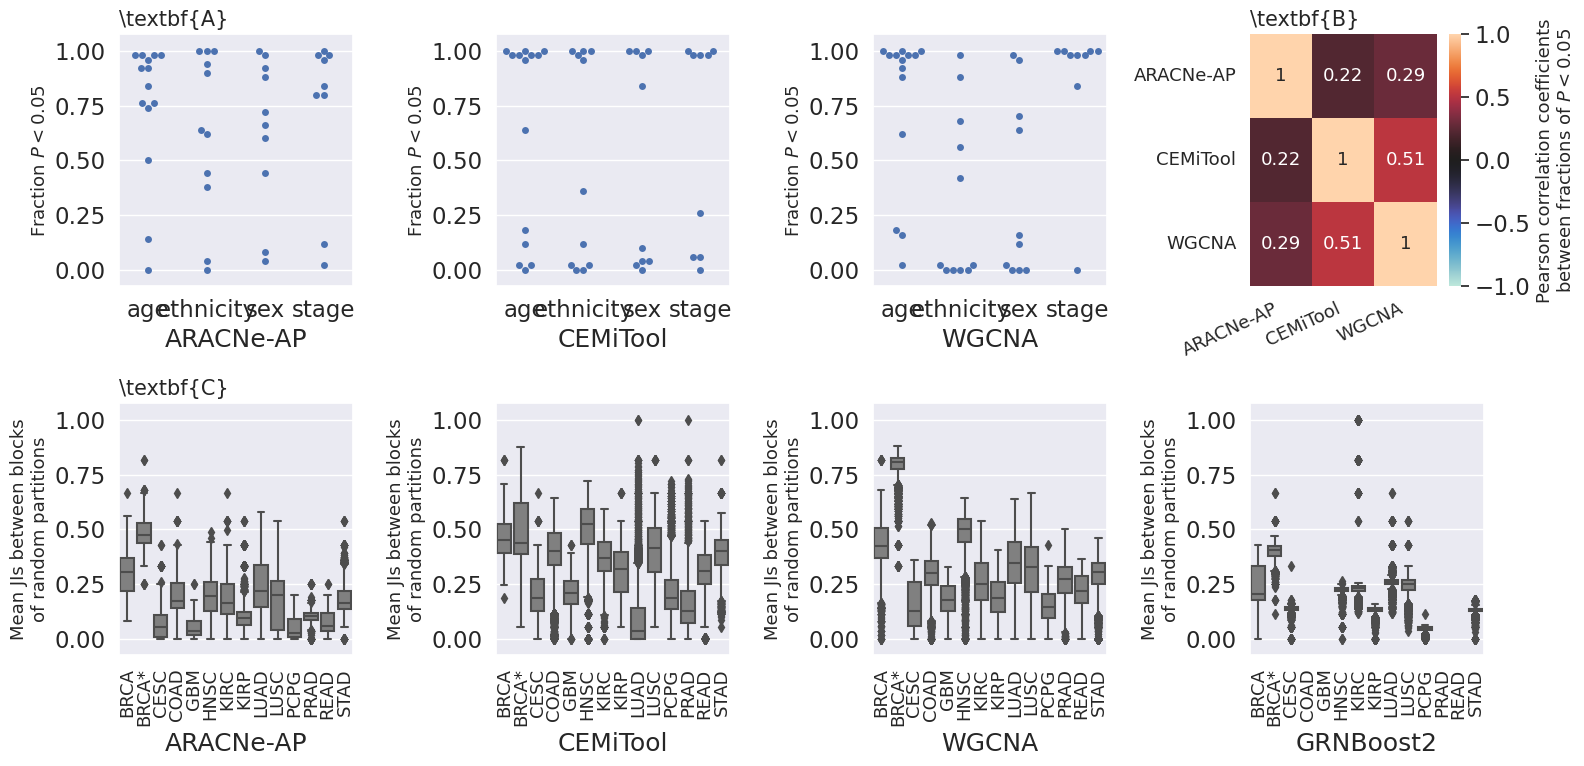

In [11]:
JI_all_random = JI_all[JI_all['Partition type'] == 'random partition']
JI_all_random = JI_all_random[JI_all_random['Confounder/\nvariable'] != 'stage']
plt.style.use('default')
#plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = 'Helvetica'
sns.set(font_scale=1.5)
sns.set_style('darkgrid',{'axes.grid' : True})
confounders = sorted(list(set(JI_all_random['Confounder/\nvariable'].values)))
algos = ['ARACNe-AP','CEMiTool','WGCNA','GRNBoost2']
cohorts = sorted(list(set(JI_all_random['Cohort'].values)))
mosaic = [['ARACNe-AP','CEMiTool','WGCNA','heatmap'],
          ['ARACNe-AP,r','CEMiTool,r','WGCNA,r','GRNBoost2,r']]
fig, axs = plt.subplot_mosaic(mosaic, figsize=(4*4, 4*2),sharex=False, sharey=False)
for algo in ['ARACNe-AP','CEMiTool','WGCNA']:
    axs[algo].set_ylim([-0.075, 1.075])
    _mwus_alg = _mwus[_mwus['Method'] == algo]
    sns.swarmplot(data=_mwus_alg,y='frac',x='Confounder/\nvariable',ax=axs[algo])
    axs[algo].set_ylabel('Fraction $P<0.05$',fontsize=13)
    axs[algo].set_xlabel(algo)
for algo in algos:
    conf_alg = f'{algo},r'
    axs[conf_alg].set_ylim([-0.075, 1.075])
    JI_alg = JI_all_random[JI_all_random['Method'] == algo]
    sns.boxplot(data=JI_alg,y='Mean JI',x='Cohort',ax=axs[conf_alg],order=cohorts,color='grey')
    axs[conf_alg].set_ylabel('Mean JIs between blocks\nof random partitions',fontsize=13)
    axs[conf_alg].set_xlabel(algo)
    axs[conf_alg].set_xticklabels(axs[conf_alg].get_xticklabels(), rotation=90,fontsize=13)
axs['ARACNe-AP'].set_title(r'\textbf{A}',loc='left', fontsize=15)
axs['ARACNe-AP,r'].set_title(r'\textbf{C}',loc='left', fontsize=15)
sns.heatmap(corr_coeff,annot=True,center=0.0,vmin=-1,vmax=1,ax=axs['heatmap'],annot_kws={'fontsize':13})
colorbar = axs['heatmap'].collections[0].colorbar
colorbar.set_label('Pearson correlation coefficients\nbetween fractions of $P<0.05$',fontsize=13)
axs['heatmap'].set_xticklabels(axs['heatmap'].get_xticklabels(), rotation=25, ha='right',fontsize=13)
axs['heatmap'].set_yticklabels(axs['heatmap'].get_yticklabels(), fontsize=13)
axs['heatmap'].set_xlabel('')
axs['heatmap'].set_ylabel('')
axs['heatmap'].set_title(r'\textbf{B}',loc='left', fontsize=15)
fig.tight_layout()
fig.savefig('plots/fig4.pdf')

## Prepare data frames for plot showing results of the first part of the test protocol

In [12]:
stage_p = pd.read_csv(os.path.join(cwd, 'chi2_pvals_stage.csv'), index_col=0, header=0)
cig_p = pd.read_csv(os.path.join(cwd, 'chi2_pvals_cigarettes_per_day.exposures.csv'), index_col=0, header=0)
alc_p = pd.read_csv(os.path.join(cwd, 'chi2_pvals_alcohol_history.exposures.csv'), index_col=0, header=0)

# for brca_metabric, put age_quartile in age column
stage_p.loc['brca_metabric']['age'] = stage_p.loc['brca_metabric']['age_quartile']
stage_p = stage_p[['age', 'ethnicity', 'sex']]
cig_p = cig_p[['age', 'ethnicity', 'sex']]
alc_p = alc_p[['age', 'ethnicity', 'sex']]

def convert_pvalue_to_asterisks(p):
    if math.isnan(p):
        return np.nan
    elif p <= 0.0001:
        return 4
    elif p <= 0.001:
        return 3
    elif p <= 0.01:
        return 2
    elif p <= 0.05:
        return 1
    else:
        return 0

In [42]:
mwus = pd.DataFrame(columns=['Method', 'Cohort', 'Confounder/\nvariable', 'k', 'mwu.pvalue'])
algs = ['GRNBoost2']
for alg_sel in algs:
    JI_ = JI_all[JI_all['Method'] == alg_sel]
    for cohort in ct_sels:
        coh = JI_[JI_['Cohort'] == cohort]
        for conf_sel in confs:
            conf = coh[coh['Confounder/\nvariable'] == conf_sel]
            if len(conf) == 0:
                continue
            c = conf[conf['Partition type']=='confounder-based partition']
            r = conf[conf['Partition type']=='random partition']
            for k in sorted(list(set(c['k']))):
                c_k = c[c['k'] == k]
                r_k = r[r['k'] == k]
                mwu = mannwhitneyu(c_k['Mean JI'],r_k['Mean JI'], alternative='less')
                df = pd.DataFrame([[alg_sel, cohort, conf_sel, k, mwu.pvalue]], columns=['Method', 'Cohort', 'Confounder/\nvariable', 'k', 'mwu.pvalue'])
                mwus = pd.concat([mwus, df])
mwus.reset_index(inplace=True)
mwus['Cohort - Variable'] = mwus['Cohort'] + ' – ' + mwus['Confounder/\nvariable']
mwus['k'] = pd.Categorical(mwus['k'], range(10, 5000, 100))
mwus['-log(p)'] = -np.log10(mwus['mwu.pvalue'])
cohort_confs = sorted(list(set(mwus['Cohort - Variable'].values)))

In [44]:
_mwus

index     Method Cohort Confounder/\nvariable  total.pvalues  sign.pvalues  \
0      0  ARACNe-AP  BRCA*                   age             50            49   
1      1   CEMiTool  BRCA*                   age             50            50   
3      3      WGCNA  BRCA*                   age             50            50   

   frac  
0  0.98  
1  1.00  
3  1.00

## Generate plots showing results of first part of the test protocol

<ipython-input-15-68df4a0fb99e>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[ct_sel].set_xticklabels(axs[ct_sel].get_xticklabels(), rotation=45, ha='left',fontsize=13)
<ipython-input-15-68df4a0fb99e>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[ct_sel].set_xticklabels(axs[ct_sel].get_xticklabels(), rotation=45, ha='left',fontsize=13)
<ipython-input-15-68df4a0fb99e>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[ct_sel].set_xticklabels(axs[ct_sel].get_xticklabels(), rotation=45, ha='left',fontsize=13)
<ipython-input-15-68df4a0fb99e>:59: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


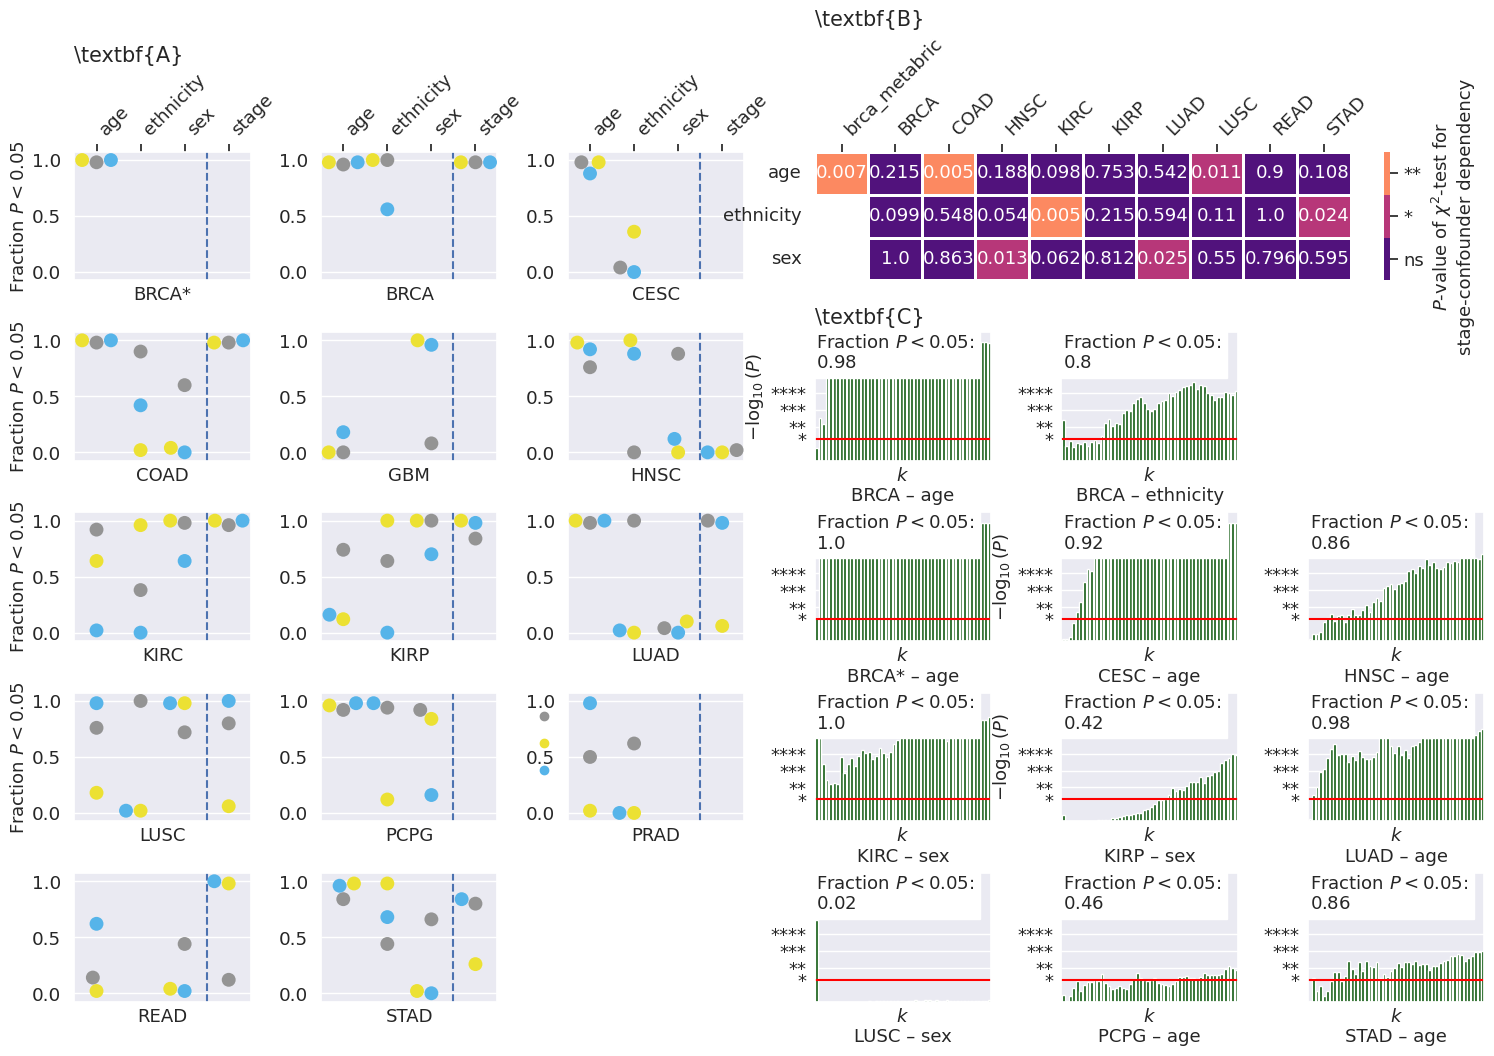

In [15]:
sns.set(font_scale=1.2)
#plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = 'Helvetica'
mosaic = [ct_sels[:3] + ['heatmap' for _ in range(3)],
          ct_sels[3:6] + cohort_confs[:2] + ['.'],
          ct_sels[6:9] + cohort_confs[2:5],
          ct_sels[9:12] + cohort_confs[5:8],
          ct_sels[12:14] + ['.'] + cohort_confs[8:12]]
fig, axs = plt.subplot_mosaic(mosaic, figsize=(6*2.5,4*2.5),sharex=False, sharey=False)
for ct_sel in ct_sels:
    _mwus_ct = _mwus[_mwus['Cohort'] == ct_sel]
    sns.swarmplot(data=_mwus_ct, ax=axs[ct_sel], x='Confounder/\nvariable', y='frac', hue='Method', s=10, palette=sns.color_palette('colorblind')[7:10])
    axs[ct_sel].axvline(x=2.5, linestyle='--')
    axs[ct_sel].set_ylim([-0.075, 1.075])
    if ct_sel == ct_sels[0]:
        axs[ct_sel].set_title(r'\textbf{A}',loc='left', fontsize=15)
        sns.move_legend(axs[ct_sel], "lower center", frameon=False, ncol=1, title=None, bbox_to_anchor=(3,-4))
    else:
        axs[ct_sel].legend().set_visible(False)
    if ct_sel in ct_sels[:3]:
        axs[ct_sel].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
        axs[ct_sel].set_xticklabels(axs[ct_sel].get_xticklabels(), rotation=45, ha='left',fontsize=13)
    else:
        axs[ct_sel].tick_params(top=False, labeltop=False, bottom=False, labelbottom=False)
    axs[ct_sel].set(xlabel=None, ylabel=None)
    axs[ct_sel].set_xlabel(ct_sel, fontsize=13)
    if ct_sel in [ct_sels[3*i] for i in range(4)]:
        axs[ct_sel].set_ylabel('Fraction $P<0.05$', labelpad=3, fontsize=13)

for cohort_conf in cohort_confs:
    axs[cohort_conf].set_ylim([0, 7.6])
    axs[cohort_conf].axhline(y=-np.log10(0.05), linestyle='-', color='red')
    axs[cohort_conf].tick_params(top=False, labeltop=False, bottom=False, labelbottom=False)
    mwus_cohort_conf = mwus[mwus['Cohort - Variable'] == cohort_conf]
    sns.barplot(data=mwus_cohort_conf, x='k', y='-log(p)', ax=axs[cohort_conf], color='darkgreen')
    axs[cohort_conf].set(ylabel=None)
    axs[cohort_conf].set_yticks([-np.log10(0.05),-np.log10(0.01),-np.log10(0.001),-np.log10(0.0001)])
    axs[cohort_conf].set_yticklabels(['*','**','***','****'], fontsize=13)
    axs[cohort_conf].tick_params(axis='y', which='major', pad=0)
    axs[cohort_conf].set_xlabel('$k$\n'+cohort_conf, fontsize=13)
    if cohort_conf in [cohort_confs[3*i] for i in range(3)]:
        axs[cohort_conf].set_ylabel('$-\log_{10}(P)$', fontsize=13,  labelpad=3)
    if cohort_conf == cohort_confs[0]:
        axs[cohort_conf].set_title(r'\textbf{C}',loc='left', fontsize=15)
    frac = mwus_cohort_conf[mwus_cohort_conf['mwu.pvalue'] < 0.05].shape[0] / mwus_cohort_conf.shape[0]
    axs[cohort_conf].text(.01, .99, f'Fraction $P<0.05$:\n${frac}$', ha='left', va='top', transform=axs[cohort_conf].transAxes,
                          fontsize=13, backgroundcolor='white')
cmap2 = sns.color_palette("magma", 3)

df_work = stage_p

ast = pd.DataFrame(np.array([df_work['age'].apply(convert_pvalue_to_asterisks).to_numpy(),
               df_work['ethnicity'].apply(convert_pvalue_to_asterisks).to_numpy(),
               df_work['sex'].apply(convert_pvalue_to_asterisks).to_numpy()]), index=df_work.columns,
                columns = df_work.index)#.T

cur = df_work.T
cur = round(cur, 3)
plt.tight_layout()
htm = sns.heatmap(ast, mask=ast.isnull(), ax=axs['heatmap'], vmin=0, vmax=2, annot=cur, cmap=cmap2, cbar=True, 
            fmt = '', annot_kws={'fontsize':13}, linewidths=1)
htm.set_facecolor('white')
axs['heatmap'].set_yticklabels(axs['heatmap'].get_ymajorticklabels(),fontsize=13)
#axs['heatmap'].set_xticklabels(axs['heatmap'].get_xmajorticklabels())
axs['heatmap'].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
axs['heatmap'].set_xticklabels(axs['heatmap'].get_xticklabels(), rotation=45, ha='left',fontsize=13)
colorbar = axs['heatmap'].collections[0].colorbar
r = colorbar.vmax - colorbar.vmin
colorbar.set_ticks([colorbar.vmin + r / 3 * (0.5 + i) for i in range(3)])
colorbar.set_ticklabels(['ns','*','**'], fontsize='13')
colorbar.set_label('$P$-value of $\chi^2$-test for\nstage-confounder dependency', fontsize='13')
axs['heatmap'].set_title(r'\textbf{B}',loc='left', fontsize=15)
fig.subplots_adjust(left=0.05,
                    bottom=0.05,
                    right=.99,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
fig.savefig('plots/fig2.pdf')

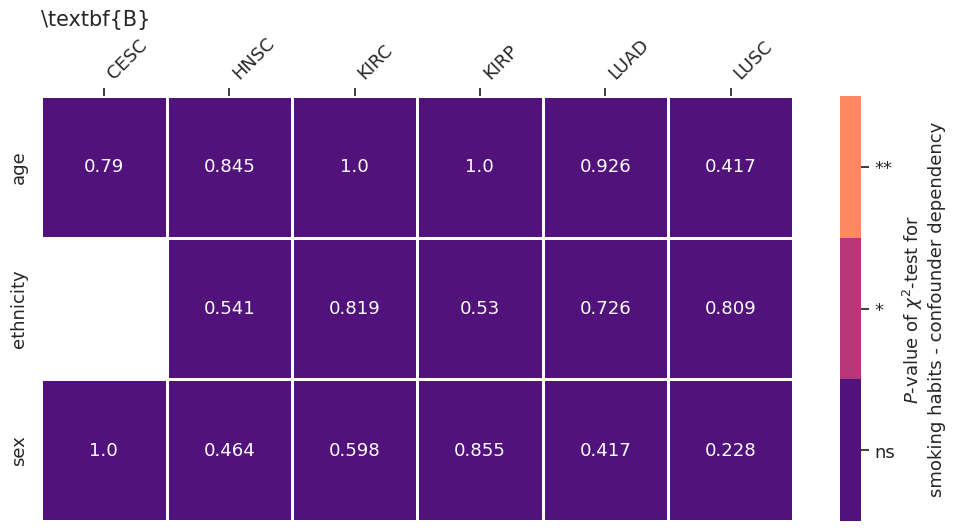

In [16]:
df_work = cig_p

ast = pd.DataFrame(np.array([df_work['age'].apply(convert_pvalue_to_asterisks).to_numpy(),
               df_work['ethnicity'].apply(convert_pvalue_to_asterisks).to_numpy(),
               df_work['sex'].apply(convert_pvalue_to_asterisks).to_numpy()]), index=df_work.columns,
                columns = df_work.index)#.T

fig, ax = plt.subplots(figsize=(10,5))

cur = df_work.T
cur = round(cur, 3)
plt.tight_layout()
htm = sns.heatmap(ast, mask=ast.isnull(), ax=ax, vmin=0, vmax=2, annot=cur, cmap=cmap2, cbar=True, 
            fmt = '', annot_kws={'fontsize':13}, linewidths=1)
htm.set_facecolor('white')

ax.set_yticklabels(ax.get_ymajorticklabels(),fontsize=13)
ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='left',fontsize=13)

colorbar = ax.collections[0].colorbar
r = colorbar.vmax - colorbar.vmin
colorbar.set_ticks([colorbar.vmin + r / 3 * (0.5 + i) for i in range(3)])
colorbar.set_ticklabels(['ns','*','**'], fontsize='13')
colorbar.set_label('$P$-value of $\chi^2$-test for\nsmoking habits - confounder dependency', fontsize='13')
ax.set_title(r'\textbf{B}',loc='left', fontsize=15)
fig.subplots_adjust(left=0.05,
                    bottom=0.05,
                    right=.99,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

Font 'default' does not have a glyph for '\x07' [U+7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x07' [U+7], substituting with a dummy symbol.


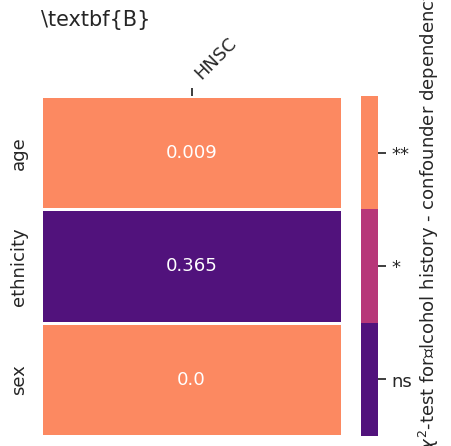

In [17]:
df_work = alc_p

ast = pd.DataFrame(np.array([df_work['age'].apply(convert_pvalue_to_asterisks).to_numpy(),
               df_work['ethnicity'].apply(convert_pvalue_to_asterisks).to_numpy(),
               df_work['sex'].apply(convert_pvalue_to_asterisks).to_numpy()]), index=df_work.columns,
                columns = df_work.index)#.T

fig, ax = plt.subplots(figsize=(4,4))

cur = df_work.T
cur = round(cur, 3)
plt.tight_layout()
htm = sns.heatmap(ast, mask=ast.isnull(), ax=ax, vmin=0, vmax=2, annot=cur, cmap=cmap2, cbar=True, 
            fmt = '', annot_kws={'fontsize':13}, linewidths=1)
htm.set_facecolor('white')

ax.set_yticklabels(ax.get_ymajorticklabels(),fontsize=13)
ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='left',fontsize=13)

colorbar = ax.collections[0].colorbar
r = colorbar.vmax - colorbar.vmin
colorbar.set_ticks([colorbar.vmin + r / 3 * (0.5 + i) for i in range(3)])
colorbar.set_ticklabels(['ns','*','**'], fontsize='13')
colorbar.set_label('$P$-value of $\chi^2$-test for\alcohol history - confounder dependency', fontsize='13')
ax.set_title(r'\textbf{B}',loc='left', fontsize=15)
fig.subplots_adjust(left=0.05,
                    bottom=0.05,
                    right=.99,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

## Generate data frames for second part of the test protocol

In [45]:
alg_sels = ['WGCNA', 'CEMITOOL', 'ARACNE', 'GRNBOOST2']
ct_sels = ['BRCA*', 'BRCA', 'CESC', 'STAD', 'KIRC', 'KIRP', 'LUAD']
conf_sels = ['age_at_initial_pathologic_diagnosis','race.demographic','gender.demographic']
blocks = {'age_at_initial_pathologic_diagnosis': ['lower', 'upper'],
          'race.demographic': ['asian', 'black or african american', 'white'],
          'gender.demographic': ['female', 'male']}
fro = 0
to = 10
cwd = os.getcwd()
JI = {'Confounder': [], 'Cohort': [], 'Method': [], 'Demographic group': [], 'Sampling': [], 'partID': [], 'k': [], 'Mean JI': []}
for alg_sel in alg_sels:
    for conf_sel in conf_sels:
        for ct_sel in ct_sels:
            for block in blocks[conf_sel]:
                path = os.path.join(cwd, 'mean_JI_G_all_comparisons')
                for i in range(fro, to):
                    for t in ['conf', 'rnd']:
                        if ct_sel == 'BRCA*':
                            filename = f'g_all_{t}_{i}_{str(alg_sel)}_age_quartile_BRCA_metabric_{block}_jaccInd.csv'
                        else:
                            filename = f'g_all_{t}_{i}_{str(alg_sel)}_{str(conf_sel)}_{str(ct_sel)}_{block}_jaccInd.csv'
                        try:
                            res = pd.read_csv(os.path.join(path, filename), sep=',', usecols=['k','mean JI', 'state'])
                            num_rows = res.shape[0]
                            JI['Confounder'] += [conf_sel for _ in range(num_rows)]
                            JI['Cohort'] += [ct_sel for _ in range(num_rows)]
                            JI['Method'] += [alg_sel for _ in range(num_rows)]
                            if conf_sel == 'age_at_initial_pathologic_diagnosis':
                                subgroup = f'{block.capitalize()} age quartile'
                            else:
                                subgroup = f'{block.capitalize()}'
                            JI['Demographic group'] += [subgroup for _ in range(num_rows)]
                            if t == 'rnd':
                                JI['Sampling'] += ['Size-matched random' for _ in range(num_rows)]
                            else:
                                JI['Sampling'] += ['Demography-based' for _ in range(num_rows)]
                            JI['partID'] += [i for _ in range(num_rows)]
                            JI['k'] += list(res['k'])
                            JI['Mean JI'] += list(res['mean JI'])
                        except:
                            continue


In [46]:
JI = pd.DataFrame(data=JI)

In [47]:
JI['Confounder'] = JI['Confounder'].replace(['age_at_initial_pathologic_diagnosis'], 'age').replace(['race.demographic'], 'ethnicity').replace(['gender.demographic'], 'sex')
JI = JI.replace('ARACNE', 'ARACNe-AP').replace('CEMITOOL', 'CEMiTool').replace('GRNBOOST2', 'GRNBoost2').replace('Black or african american', 'Black or African American')
JI = JI[JI['k']%100 == 10]
JI['Cohort – confounder'] = JI['Cohort'] + ' – ' + JI['Confounder']
JI['Method'] = pd.Categorical(JI['Method'], ['ARACNe-AP', 'CEMiTool', 'GRNBoost2', 'WGCNA'])
JI['Cohort – confounder'] = pd.Categorical(JI['Cohort – confounder'], list(JI['Cohort – confounder'].unique()))
JI['Demographic group'] = pd.Categorical(JI['Demographic group'], list(JI['Demographic group'].unique()))

## Plot results of second part of the test protocol

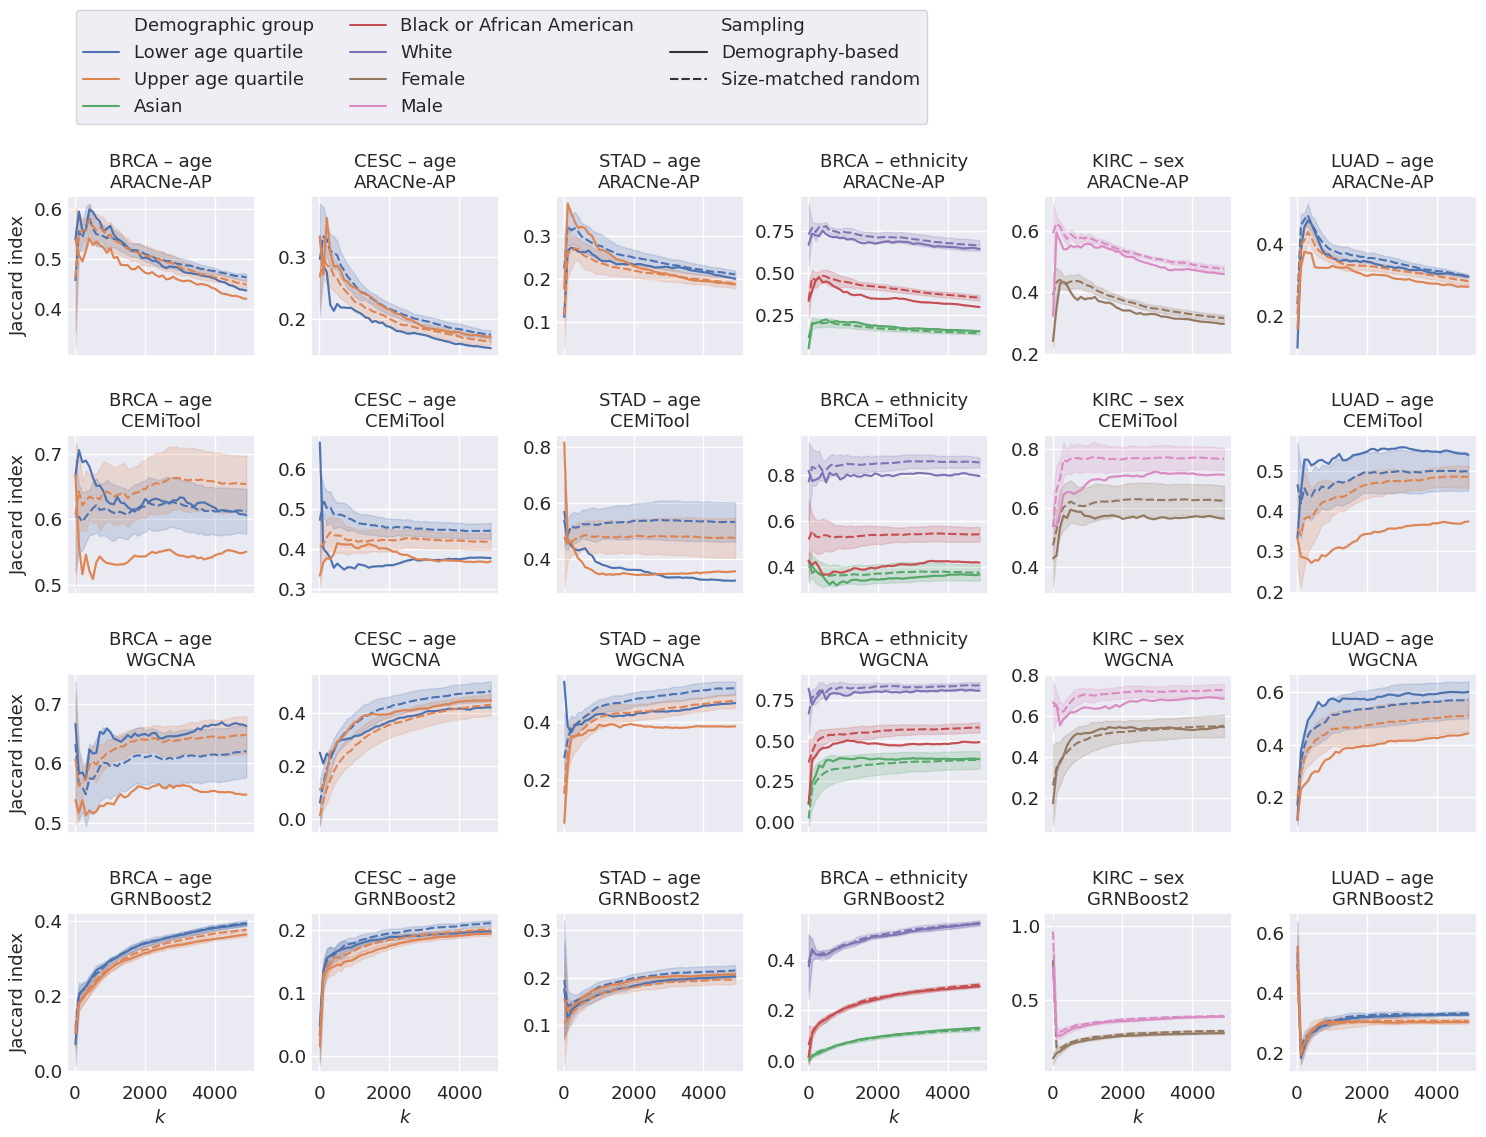

In [48]:
sns.set(font_scale=1.2)
#plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = 'Helvetica'
selected_coco_pairs = ['BRCA – age', 'CESC – age','STAD – age','BRCA – ethnicity','KIRC – sex', 'LUAD – age']
algos = list(set(JI['Method'].values))
algos = ['ARACNe-AP','CEMiTool', 'WGCNA', 'GRNBoost2']
fig, axs = plt.subplots(len(algos), len(selected_coco_pairs), figsize=(6*2.5, 3*len(algos)), sharex=True, sharey=False)
for j, coco in enumerate(selected_coco_pairs):
    JI_coco = JI[JI['Cohort – confounder'] == coco]
    for i, algo in enumerate(algos):
        JI_alg = JI_coco[JI_coco['Method'] == algo]
        sns.lineplot(data=JI_alg, x='k', y='Mean JI', errorbar='sd', ax=axs[i,j], style='Sampling', hue='Demographic group')
        if i == 0 and j == 0:
            sns.move_legend(axs[i,j], "lower left", ncol=3, bbox_to_anchor=(0.0, 1.4), fontsize=13)
        else:
            axs[i,j].legend().set_visible(False)
        axs[i,j].set_title(f'{coco}\n{algo}', fontsize=13)
        axs[i,j].set_xlabel('$k$', fontsize=13)
        if j == 0:
            axs[i,j].set_ylabel('Jaccard index', fontsize=13)
        else:
            axs[i,j].set_ylabel('')
        axs[i,j].tick_params(axis='y',pad=-3)
fig.subplots_adjust(left=0.05,
                    bottom=0.06,
                    right=.99,
                    top=0.79,
                    wspace=0.3,
                    hspace=0.5)
fig.savefig('plots/fig3.pdf')

In [49]:
selected_coco_pairs = ['BRCA* – age', 'BRCA – age','CESC – age', 'HNSC – age','STAD – age','BRCA – ethnicity','KIRC – sex', 'LUAD – age']
mwus_g_all = pd.DataFrame(columns=['Method', 'Cohort – confounder', 'Demographic group', 'k', 'mwu.pvalue'])
for alg_sel in ['ARACNe-AP', 'CEMiTool', 'GRNBoost2', 'WGCNA']:
    JI_ = JI[JI['Method'] == alg_sel]
    for j, coco in enumerate(selected_coco_pairs):
        coh = JI_[JI_['Cohort – confounder'] == coco]
        if len(coh) == 0:
            continue
        for dem in list(set(coh['Demographic group'].values)):
            conf = coh[coh['Demographic group'] == dem]
            c = conf[conf['Sampling']=='Demography-based']
            r = conf[conf['Sampling']=='Size-matched random']
            for k in sorted(list(set(c['k']))):
                c_k = c[c['k'] == k]
                r_k = r[r['k'] == k]
                if len(c_k) != 10 or len(r_k) != 10:
                    print(f'conf {alg_sel}, {coco}, {dem}, {k}: {len(c_k)}, {len(r_k)}')
                    continue
                else:
                    mwu = mannwhitneyu(c_k['Mean JI'],r_k['Mean JI'], alternative='two-sided')
                    df = pd.DataFrame([[alg_sel, coco, dem, k, mwu.pvalue]], columns=['Method', 'Cohort – confounder', 'Demographic group', 'k', 'mwu.pvalue'])
                    mwus_g_all = pd.concat([mwus_g_all, df])
                
mwus_g_all.reset_index(inplace=True)
mwus_g_all = mwus_g_all.drop('index', axis=1).drop('k', axis=1)

count = mwus_g_all.groupby(['Method', 'Cohort – confounder', 'Demographic group']).count().reset_index()
count.rename(columns={'mwu.pvalue':'total.pvalues'}, inplace=True)

sign_ = mwus_g_all[mwus_g_all['mwu.pvalue'] < alpha]
sign_ = sign_.groupby(['Method', 'Cohort – confounder', 'Demographic group']).count().reset_index()
sign_.rename(columns={'mwu.pvalue':'sign.pvalues'}, inplace=True)
sign = pd.merge(count, sign_,  how='left', left_on=['Method', 'Cohort – confounder', 'Demographic group'],
              right_on=['Method', 'Cohort – confounder', 'Demographic group']).fillna(0)
sign['frac'] = sign['sign.pvalues']/sign['total.pvalues']

In [16]:
sign

Method Cohort – confounder          Demographic group  total.pvalues  \
0   ARACNe-AP          BRCA – age         Lower age quartile             50   
1   ARACNe-AP          BRCA – age         Upper age quartile             50   
2   ARACNe-AP    BRCA – ethnicity                      Asian             50   
3   ARACNe-AP    BRCA – ethnicity  Black or African American             50   
4   ARACNe-AP    BRCA – ethnicity                      White             50   
5   ARACNe-AP         BRCA* – age         Lower age quartile             50   
6   ARACNe-AP         BRCA* – age         Upper age quartile             50   
7   ARACNe-AP          CESC – age         Lower age quartile             50   
8   ARACNe-AP          CESC – age         Upper age quartile             50   
9   ARACNe-AP          KIRC – sex                     Female             50   
10  ARACNe-AP          KIRC – sex                       Male             50   
11  ARACNe-AP          LUAD – age         Lower age quartile             50   
12  ARACNe-AP          LUAD – age         Upper age quartile             50   
13  ARACNe-AP          STAD – age         Lower age quartile             50   
14  ARACNe-AP          STAD – age         Upper age quartile             50   
15   CEMiTool          BRCA – age         Lower age quartile             50   
16   CEMiTool          BRCA – age         Upper age quartile             50   
17   CEMiTool    BRCA – ethnicity                      Asian             50   
18   CEMiTool    BRCA – ethnicity  Black or African American             50   
19   CEMiTool    BRCA – ethnicity                      White             50   
20   CEMiTool         BRCA* – age         Lower age quartile             50   
21   CEMiTool         BRCA* – age         Upper age quartile             50   
22   CEMiTool          CESC – age         Lower age quartile             50   
23   CEMiTool          CESC – age         Upper age quartile             50   
24   CEMiTool          KIRC – sex                     Female             50   
25   CEMiTool          KIRC – sex                       Male             50   
26   CEMiTool          LUAD – age         Lower age quartile             50   
27   CEMiTool          LUAD – age         Upper age quartile             50   
28   CEMiTool          STAD – age         Lower age quartile             50   
29   CEMiTool          STAD – age         Upper age quartile             50   
30  GRNBoost2          BRCA – age         Lower age quartile             50   
31  GRNBoost2          BRCA – age         Upper age quartile             50   
32  GRNBoost2    BRCA – ethnicity                      Asian             50   
33  GRNBoost2    BRCA – ethnicity  Black or African American             50   
34  GRNBoost2    BRCA – ethnicity                      White             50   
35  GRNBoost2         BRCA* – age         Lower age quartile             50   
36  GRNBoost2         BRCA* – age         Upper age quartile             50   
37  GRNBoost2          CESC – age         Lower age quartile             50   
38  GRNBoost2          CESC – age         Upper age quartile             50   
39  GRNBoost2          KIRC – sex                     Female             50   
40  GRNBoost2          KIRC – sex                       Male             50   
41  GRNBoost2          LUAD – age         Lower age quartile             50   
42  GRNBoost2          LUAD – age         Upper age quartile             50   
43  GRNBoost2          STAD – age         Lower age quartile             50   
44  GRNBoost2          STAD – age         Upper age quartile             50   
45      WGCNA          BRCA – age         Lower age quartile             50   
46      WGCNA          BRCA – age         Upper age quartile             50   
47      WGCNA    BRCA – ethnicity                      Asian             50   
48      WGCNA    BRCA – ethnicity  Black or African American             50   
49      WGCNA    BRCA – ethnicity                      Wh

## Part 2 for the METABRIC BRCA (BRCA*) cohort

<ipython-input-50-a3d190e059a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta['Demographic group'] = pd.Categorical(meta['Demographic group'], list(meta['Demographic group'].unique()))


<Figure size 640x480 with 0 Axes>

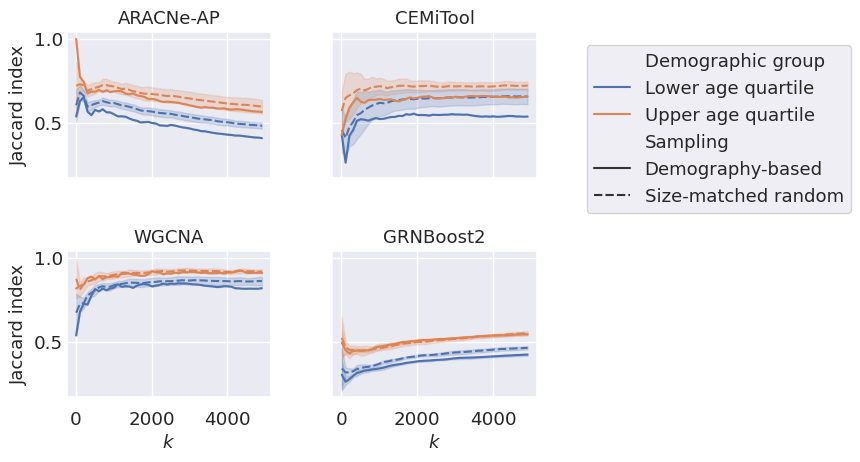

In [50]:
plt.tight_layout()
meta = JI[JI['Cohort – confounder'] == 'BRCA* – age']
meta['Demographic group'] = pd.Categorical(meta['Demographic group'], list(meta['Demographic group'].unique()))
mosaic = [algos[0:2], algos[2:4]]
fig, axs = plt.subplot_mosaic(mosaic, figsize=(5,5),sharex=True, sharey=True)

for alg in algos:
    meta_alg = meta[meta['Method'] == alg]
    sns.lineplot(data=meta_alg, x='k', y='Mean JI', errorbar='sd', ax=axs[alg], style='Sampling', hue='Demographic group')
    if alg == algs[0]:
        sns.move_legend(axs[alg], "lower left", ncol=1, bbox_to_anchor=(1.2, 1.2), fontsize=13)
    else:
        axs[alg].legend().set_visible(False)
    axs[alg].set_title(f'{alg}', fontsize=13)
    axs[alg].set_xlabel('$k$', fontsize=13)
    if alg == algos[0] or alg == algos[2]:
        axs[alg].set_ylabel('Jaccard index', fontsize=13)
    else:
        axs[alg].set_ylabel('')
    axs[alg].tick_params(axis='y',pad=-3)
fig.subplots_adjust(left=0.05,
                    bottom=0.06,
                    right=.99,
                    top=0.79,
                    wspace=0.3,
                    hspace=0.5)
    
fig.savefig('plots/METABRIC_part_B.pdf', bbox_inches='tight')